<a href="https://colab.research.google.com/github/alejandradib/19a-RepasoRick-and-Morty/blob/main/EDA_km_diarios_con_IPK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratorio de Datos (EDA) de los recorridos diarios

In [ ]:
# Análisis Exploratorio de Datos (EDA) - Recorridos Vehiculares
#
# ## 1. Carga y Primera Inspección
import pandas as pd
import numpy as np
from google.colab import drive

drive.mount('/content/drive')

# Cargar datos
path = '/content/drive/MyDrive/Colab Notebooks/datasets/10. Recorridos diarios (1).xlsx'
df_diario = pd.read_excel(path, sheet_name=0)
df_acumulado = pd.read_excel(path, sheet_name=1)

# Renombrar columnas para facilidad
df_diario = df_diario.rename(columns={
    'kilometraje aproximado en ruta': 'km',
    'numveh': 'vehiculo',
    'numrecs': 'recorridos'
})

df_acumulado = df_acumulado.rename(columns={
    'SUM de kilometraje aproximado en ruta': 'km_total',
    'numveh': 'vehiculo',
    'numrecs': 'recorridos_total'
})


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 2. Estructura Básica de los Datos
print("📌 Datos Diarios - Primeras filas:")
display(df_diario.head(15))

📌 Datos Diarios - Primeras filas:


,CANTIDAD DE RECORRIDOS DE TODOS LOS VEHÍCULOS QUE TRABAJARON OCTUBRE,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,Datos ordenados por FECHA Y NÚMERO DE VEHÍCULO,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,fecha,numveh,numrecs,kilometraje aproximado en ruta
4,2023-10-01 00:00:00,2797,10,142.652927
5,2023-10-01 00:00:00,2811,9,132.090919
6,2023-10-01 00:00:00,2823,9,109.048091
7,2023-10-01 00:00:00,2829,9,130.978321
8,2023-10-01 00:00:00,2836,8,115.847779
9,2023-10-01 00:00:00,2837,8,110.239041


In [ ]:
print("\n🔍 Datos Diarios - Información Estructural:")
print(f"Filas: {df_diario.shape[0]}, Columnas: {df_diario.shape[1]}")
print("\nTipos de datos:")
print(df_diario.dtypes)




🔍 Datos Diarios - Información Estructural:
Filas: 9464, Columnas: 4

Tipos de datos:
CANTIDAD DE RECORRIDOS DE TODOS LOS VEHÍCULOS QUE TRABAJARON OCTUBRE    object
Unnamed: 1                                                              object
Unnamed: 2                                                              object
Unnamed: 3                                                              object
dtype: object


Pandas no está detectando correctamente los encabezados en el archivo Excel que empieza a partir de la fila 5. Se hacen cambios para eso:

In [ ]:
# 2. Carga Correcta de Datos con Preprocesamiento

import pandas as pd

# Cargar datos diarios (saltando las primeras 5 filas que son metadatos)
df_diario = pd.read_excel(
    path,
    sheet_name=0,
    skiprows=4,  # Saltamos las primeras 4 filas (la 5ta será el encabezado)
    header=0,    # Usamos la siguiente fila (ahora primera del DataFrame) como encabezado
    names=['fecha', 'numveh', 'numrecs', 'km']  # Nombres personalizados de columnas
)


# Verificación
print("✅ Datos Diarios - Estructura Corregida:")
print(f"Filas: {df_diario.shape[0]}, Columnas: {df_diario.shape[1]}")
print("\nPrimeras filas:")
display(df_diario.head())

print("\nUltimas filas:")
display(df_diario.tail())

✅ Datos Diarios - Estructura Corregida:
Filas: 9460, Columnas: 4

Primeras filas:


,fecha,numveh,numrecs,km
0,2023-10-01,2797,10,142.652927
1,2023-10-01,2811,9,132.090919
2,2023-10-01,2823,9,109.048091
3,2023-10-01,2829,9,130.978321
4,2023-10-01,2836,8,115.847779



Ultimas filas:


,fecha,numveh,numrecs,km
9455,2023-10-31,3156,8,121.196074
9456,2023-10-31,3157,11,105.597169
9457,2023-10-31,3158,9,111.386106
9458,2023-10-31,3342,9,116.106727
9459,2023-10-31,3462,13,169.116119


In [ ]:
# 3.1 Análisis de valores nulos y duplicados
print("🔍 VALORES NULOS POR COLUMNA:")
print(df_diario.isnull().sum())

print("\n🔍 VALORES DUPLICADOS:")
print(f"Registros duplicados: {df_diario.duplicated().sum()}")

# 3.2 Análisis de valores extremos (outliers) por percentiles
print("\n🔍 ANÁLISIS DE OUTLIERS (Percentiles 1% y 99%):")
for col in ['numrecs', 'km']:
    Q1 = df_diario[col].quantile(0.01)
    Q99 = df_diario[col].quantile(0.99)
    outliers = df_diario[(df_diario[col] < Q1) | (df_diario[col] > Q99)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df_diario)*100:.2f}%)")

🔍 VALORES NULOS POR COLUMNA:
fecha      0
numveh     0
numrecs    0
km         0
dtype: int64

🔍 VALORES DUPLICADOS:
Registros duplicados: 0

🔍 ANÁLISIS DE OUTLIERS (Percentiles 1% y 99%):
numrecs: 141 outliers (1.49%)
km: 190 outliers (2.01%)


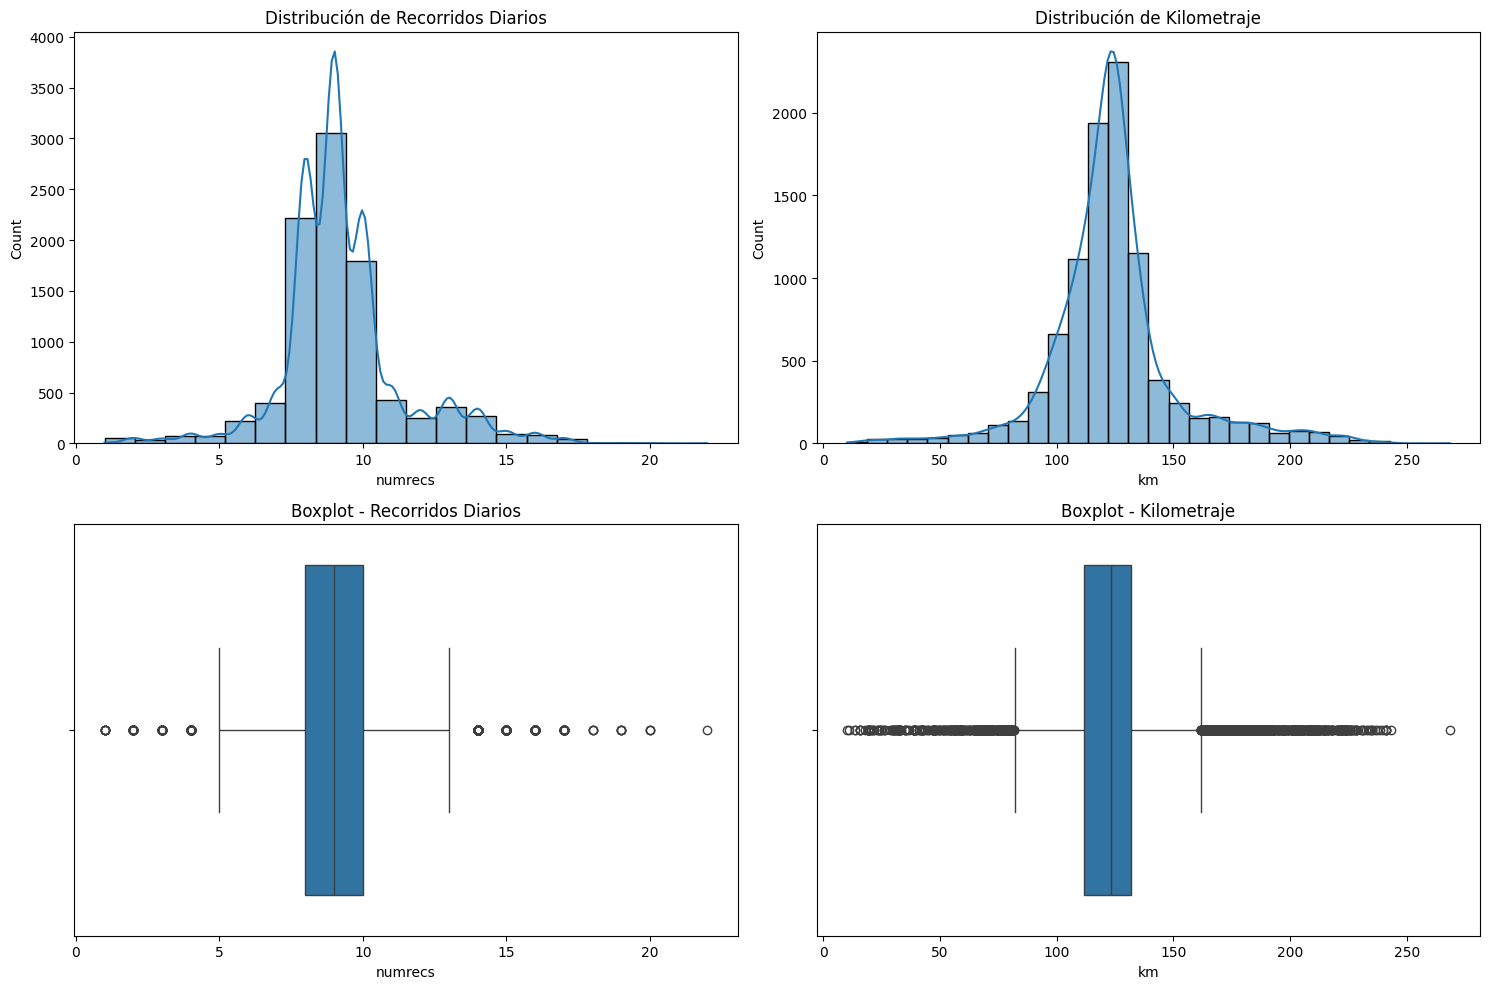

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2.1 Distribución de variables numéricas
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribución de recorridos
sns.histplot(df_diario['numrecs'], bins=20, ax=axes[0,0], kde=True)
axes[0,0].set_title('Distribución de Recorridos Diarios')

# Distribución de kilometraje
sns.histplot(df_diario['km'], bins=30, ax=axes[0,1], kde=True)
axes[0,1].set_title('Distribución de Kilometraje')

# Boxplot de recorridos
sns.boxplot(x=df_diario['numrecs'], ax=axes[1,0])
axes[1,0].set_title('Boxplot - Recorridos Diarios')

# Boxplot de kilometraje
sns.boxplot(x=df_diario['km'], ax=axes[1,1])
axes[1,1].set_title('Boxplot - Kilometraje')

plt.tight_layout()
plt.show()

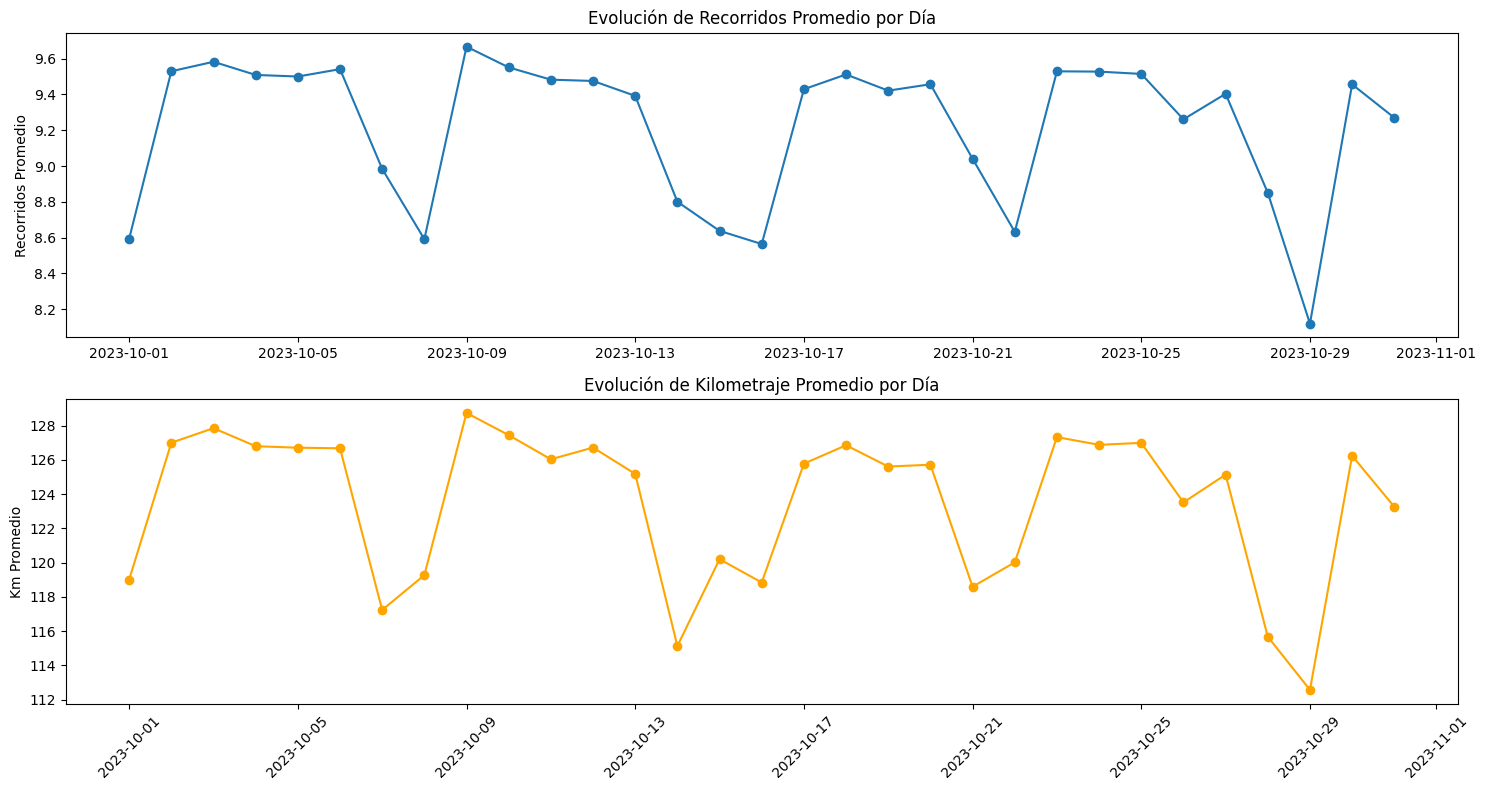

In [ ]:
# 3.1 Evolución diaria de métricas clave
df_diario['fecha_date'] = df_diario['fecha'].dt.date
daily_stats = df_diario.groupby('fecha_date').agg({
    'numrecs': 'mean',
    'km': 'mean',
    'numveh': 'nunique'
}).reset_index()

# 3.2 Gráfico de series temporales
fig, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(daily_stats['fecha_date'], daily_stats['numrecs'], marker='o')
axes[0].set_title('Evolución de Recorridos Promedio por Día')
axes[0].set_ylabel('Recorridos Promedio')

axes[1].plot(daily_stats['fecha_date'], daily_stats['km'], marker='o', color='orange')
axes[1].set_title('Evolución de Kilometraje Promedio por Día')
axes[1].set_ylabel('Km Promedio')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 4.1 Estadísticas por vehículo
vehicle_stats = df_diario.groupby('numveh').agg({
    'numrecs': ['mean', 'std', 'count'],
    'km': ['mean', 'std'],
    'fecha': 'nunique'
}).round(2)

vehicle_stats.columns = ['recs_mean', 'recs_std', 'recs_count', 'km_mean', 'km_std', 'dias_activo']
vehicle_stats = vehicle_stats.reset_index()

print("📊 ESTADÍSTICAS POR VEHÍCULO:")
display(vehicle_stats.head(10))

# 4.2 Top 10 vehículos más activos
print("\n🚗 TOP 10 VEHÍCULOS MÁS ACTIVOS:")
top_vehicles = vehicle_stats.nlargest(10, 'recs_count')
display(top_vehicles)

📊 ESTADÍSTICAS POR VEHÍCULO:


,numveh,recs_mean,recs_std,recs_count,km_mean,km_std,dias_activo
0,2784,8.96,1.00,26,126.72,13.55,26
1,2785,9.28,1.62,25,122.65,19.91,25
2,2786,8.77,0.71,26,123.43,10.52,26
3,2787,9.96,1.88,25,135.17,26.90,25
4,2788,12.27,2.66,26,168.13,33.34,26
5,2789,10.57,2.31,23,145.36,34.83,23
6,2790,11.92,3.29,26,161.91,42.79,26
7,2791,8.69,1.46,26,117.47,18.34,26
8,2792,9.17,1.95,23,128.71,27.52,23
9,2793,9.00,1.14,24,122.96,15.55,24



🚗 TOP 10 VEHÍCULOS MÁS ACTIVOS:


,numveh,recs_mean,recs_std,recs_count,km_mean,km_std,dias_activo
93,2878,9.38,0.98,29,124.85,13.27,29
288,3077,9.07,1.33,29,125.20,17.59,29
32,2816,8.93,0.94,28,121.45,13.84,28
36,2820,8.61,1.26,28,119.48,19.01,28
39,2823,8.86,1.38,28,123.99,21.67,28
53,2837,8.61,1.83,28,119.93,24.91,28
54,2838,9.29,1.36,28,124.25,12.12,28
110,2896,8.46,1.00,28,118.03,14.98,28
134,2921,8.68,2.31,28,115.77,29.76,28
136,2923,8.39,1.93,28,117.88,25.99,28


📊 MATRIZ DE CORRELACIÓN:


,numrecs,km
numrecs,1.000000,0.767794
km,0.767794,1.000000


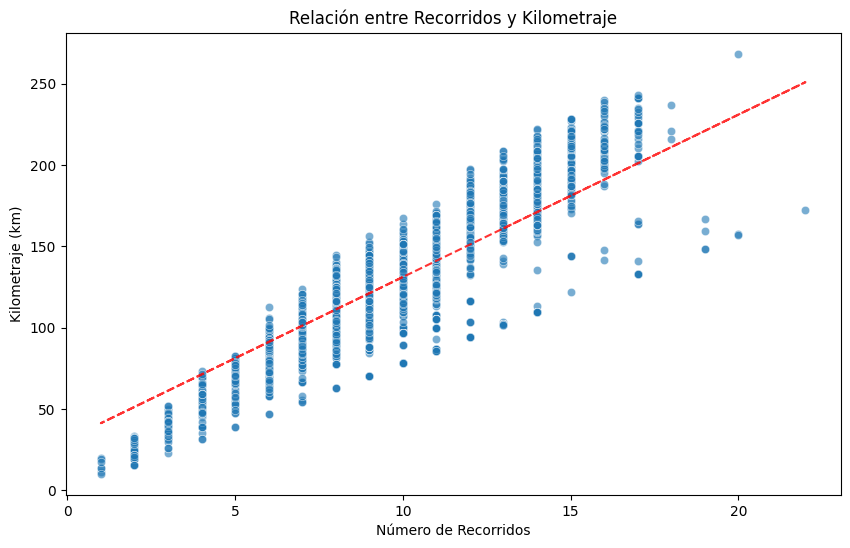

In [ ]:
# 5.1 Matriz de correlación
correlation_matrix = df_diario[['numrecs', 'km']].corr()
print("📊 MATRIZ DE CORRELACIÓN:")
display(correlation_matrix)

# 5.2 Scatter plot con línea de tendencia
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_diario, x='numrecs', y='km', alpha=0.6)
plt.title('Relación entre Recorridos y Kilometraje')
plt.xlabel('Número de Recorridos')
plt.ylabel('Kilometraje (km)')

# Línea de tendencia
z = np.polyfit(df_diario['numrecs'], df_diario['km'], 1)
p = np.poly1d(z)
plt.plot(df_diario['numrecs'], p(df_diario['numrecs']), "r--", alpha=0.8)

plt.show()

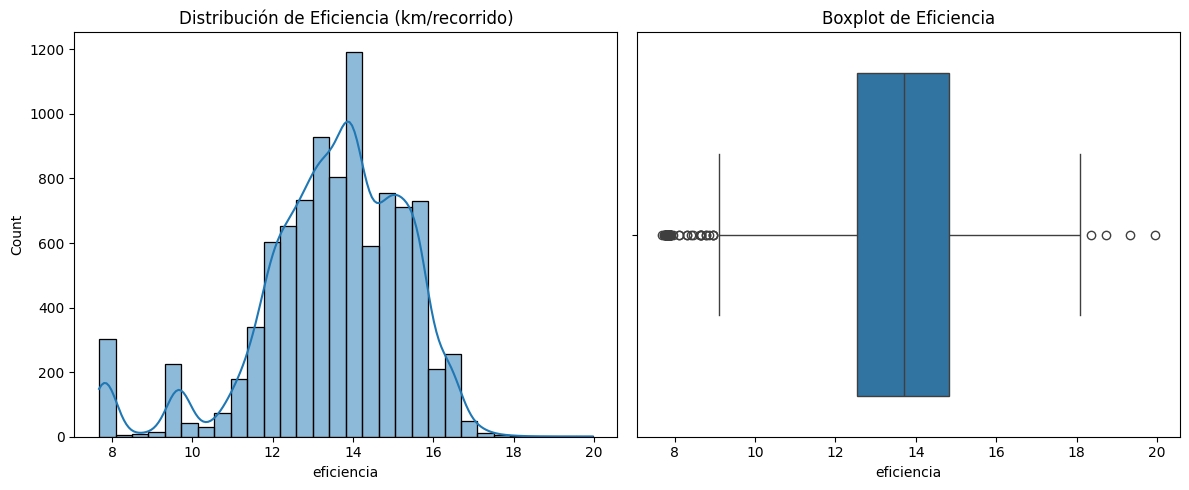


🔍 Rango normal de eficiencia: 9.69 a 16.05 km/recorrido


In [ ]:
# 6.1 Calcular eficiencia (km por recorrido)
df_diario['eficiencia'] = df_diario['km'] / df_diario['numrecs']

# 6.2 Análisis de distribución de eficiencia
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_diario['eficiencia'], bins=30, kde=True)
plt.title('Distribución de Eficiencia (km/recorrido)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_diario['eficiencia'])
plt.title('Boxplot de Eficiencia')

plt.tight_layout()
plt.show()

# 6.3 Identificar valores extremos en eficiencia
Q1_eff = df_diario['eficiencia'].quantile(0.05)
Q99_eff = df_diario['eficiencia'].quantile(0.95)
print(f"\n🔍 Rango normal de eficiencia: {Q1_eff:.2f} a {Q99_eff:.2f} km/recorrido")

In [ ]:
# Promedios generales:
print("📈 MÉTRICAS PROMEDIO DIARIAS:")
print(f"Recorridos por vehículo: {df_diario['numrecs'].mean():.2f}")
print(f"Kilometraje por vehículo: {df_diario['km'].mean():.2f} km")
print(f"Eficiencia promedio: {df_diario['eficiencia'].mean():.2f} km/recorrido")

📈 MÉTRICAS PROMEDIO DIARIAS:
Recorridos por vehículo: 9.30
Kilometraje por vehículo: 124.18 km
Eficiencia promedio: 13.50 km/recorrido


In [ ]:
# Calcular eficiencia por vehículo
eficiencia_vehiculos = df_diario.groupby('numveh').agg({
    'eficiencia': ['mean', 'std', 'count'],
    'numrecs': 'mean',
    'km': 'mean'
}).round(2)

eficiencia_vehiculos.columns = ['eff_mean', 'eff_std', 'count', 'recs_mean', 'km_mean']
eficiencia_vehiculos = eficiencia_vehiculos.reset_index()

# Identificar mejores y peores en eficiencia
print("🚀 TOP 10 VEHÍCULOS MÁS EFICIENTES:")
display(eficiencia_vehiculos.nlargest(10, 'eff_mean'))

print("\n⚠️ TOP 10 VEHÍCULOS MENOS EFICIENTES:")
display(eficiencia_vehiculos.nsmallest(10, 'eff_mean'))

🚀 TOP 10 VEHÍCULOS MÁS EFICIENTES:


,numveh,eff_mean,eff_std,count,recs_mean,km_mean
138,2925,14.60,1.12,27,8.33,121.57
190,2978,14.41,1.26,26,8.54,122.42
162,2950,14.40,0.94,27,8.67,124.65
264,3053,14.39,1.33,24,8.67,123.39
89,2874,14.38,1.32,26,8.73,125.25
316,3106,14.38,1.39,27,8.89,127.00
85,2870,14.34,1.50,27,9.85,140.84
124,2910,14.34,1.29,26,8.81,125.74
211,2999,14.34,1.65,27,9.26,131.16
213,3001,14.32,1.43,26,8.69,124.01



⚠️ TOP 10 VEHÍCULOS MENOS EFICIENTES:


,numveh,eff_mean,eff_std,count,recs_mean,km_mean
115,2901,8.58,0.88,27,11.48,98.03
119,2905,8.58,0.92,26,11.81,100.18
310,3100,8.58,0.91,26,11.35,96.29
109,2895,8.60,0.91,25,10.80,91.21
46,2830,8.61,0.93,24,9.71,82.78
262,3051,8.62,0.91,27,11.63,99.76
26,2810,8.63,0.91,24,11.33,96.07
358,3148,8.63,0.94,23,11.13,95.64
231,3019,8.64,0.89,26,11.42,97.87
148,2935,8.65,0.90,26,11.58,99.18


In [ ]:
# Clasificar vehículos por días activos
df_diario['dias_activo_mes'] = df_diario.groupby('numveh')['fecha'].transform('nunique')

# Analizar eficiencia por segmento de actividad
segmentos = df_diario.groupby('dias_activo_mes').agg({
    'eficiencia': 'mean',
    'numrecs': 'mean',
    'km': 'mean',
    'numveh': 'count'
}).round(2)

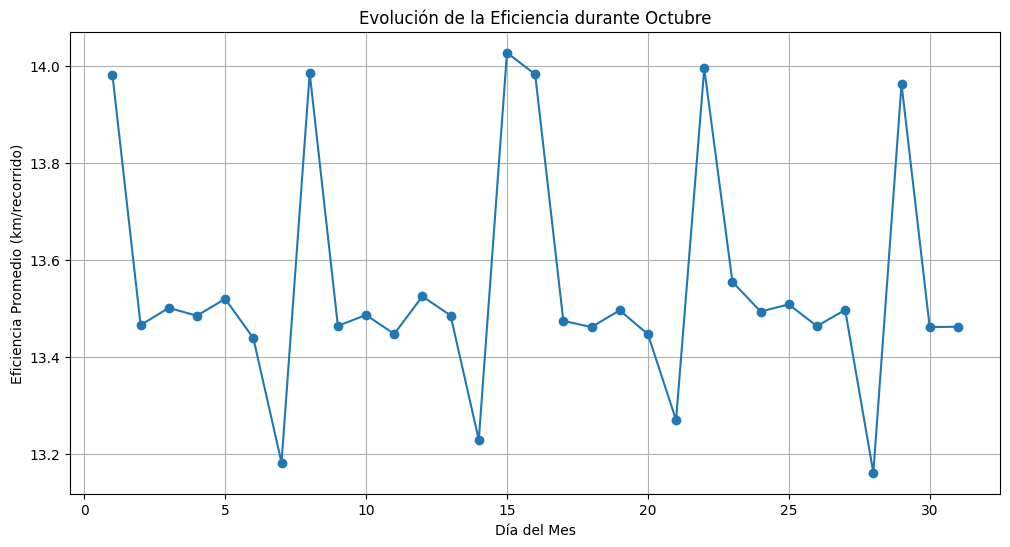

In [ ]:
# Tendencia de eficiencia durante el mes
df_diario['dia_mes'] = df_diario['fecha'].dt.day
eficiencia_diaria = df_diario.groupby('dia_mes').agg({
    'eficiencia': 'mean',
    'numrecs': 'mean',
    'km': 'mean'
})

# Gráfico de evolución diaria
plt.figure(figsize=(12, 6))
plt.plot(eficiencia_diaria.index, eficiencia_diaria['eficiencia'], marker='o')
plt.title('Evolución de la Eficiencia durante Octubre')
plt.xlabel('Día del Mes')
plt.ylabel('Eficiencia Promedio (km/recorrido)')
plt.grid(True)
plt.show()

In [ ]:
# Vehículos con alta variabilidad en eficiencia
alta_varianza = eficiencia_vehiculos[eficiencia_vehiculos['eff_std'] > eficiencia_vehiculos['eff_std'].quantile(0.75)]
print(f"🔍 {len(alta_varianza)} vehículos con alta variabilidad en eficiencia")
display(alta_varianza.sort_values('eff_std', ascending=False).head(10))

🔍 91 vehículos con alta variabilidad en eficiencia


,numveh,eff_mean,eff_std,count,recs_mean,km_mean
200,2988,13.73,2.29,12,8.08,112.67
340,3130,14.27,1.99,26,8.12,114.04
19,2803,13.48,1.96,25,8.00,107.84
214,3002,13.70,1.93,25,9.32,126.27
71,2855,13.91,1.91,26,9.08,125.21
61,2845,13.90,1.86,25,9.08,123.83
315,3105,14.13,1.84,23,8.26,115.82
193,2981,13.51,1.78,27,8.33,111.61
100,2885,14.22,1.77,23,9.26,131.18
72,2856,13.99,1.76,27,8.11,113.30


In [ ]:
# 1.1 Clasificar vehículos por nivel de eficiencia
eficiencia_vehiculos['categoria_eficiencia'] = pd.cut(eficiencia_vehiculos['eff_mean'],
                                                     bins=[0, 10, 13, 16],
                                                     labels=['Baja', 'Media', 'Alta'])

print("📊 DISTRIBUCIÓN POR CATEGORÍA DE EFICIENCIA:")
print(eficiencia_vehiculos['categoria_eficiencia'].value_counts())

# 1.2 Vehículos críticos (baja eficiencia + alta actividad)
vehiculos_criticos = eficiencia_vehiculos[
    (eficiencia_vehiculos['categoria_eficiencia'] == 'Baja') &
    (eficiencia_vehiculos['count'] >= 20)  # Más de 20 días activos
].sort_values('eff_mean')

print("\n🚨 VEHÍCULOS CRÍTICOS (Baja eficiencia + Alta actividad):")
display(vehiculos_criticos[['numveh', 'eff_mean', 'count', 'recs_mean', 'km_mean']])

📊 DISTRIBUCIÓN POR CATEGORÍA DE EFICIENCIA:
categoria_eficiencia
Alta     348
Baja      23
Media      0
Name: count, dtype: int64

🚨 VEHÍCULOS CRÍTICOS (Baja eficiencia + Alta actividad):


,numveh,eff_mean,count,recs_mean,km_mean
115,2901,8.58,27,11.48,98.03
119,2905,8.58,26,11.81,100.18
310,3100,8.58,26,11.35,96.29
109,2895,8.60,25,10.80,91.21
46,2830,8.61,24,9.71,82.78
262,3051,8.62,27,11.63,99.76
26,2810,8.63,24,11.33,96.07
358,3148,8.63,23,11.13,95.64
231,3019,8.64,26,11.42,97.87
302,3092,8.65,26,11.23,95.70


📊 MATRIZ DE CORRELACIÓN COMPLETA:


,eff_mean,recs_mean,km_mean,count
eff_mean,1.000000,-0.474561,0.457093,0.008796
recs_mean,-0.474561,1.000000,0.563465,0.116975
km_mean,0.457093,0.563465,1.000000,0.129322
count,0.008796,0.116975,0.129322,1.000000


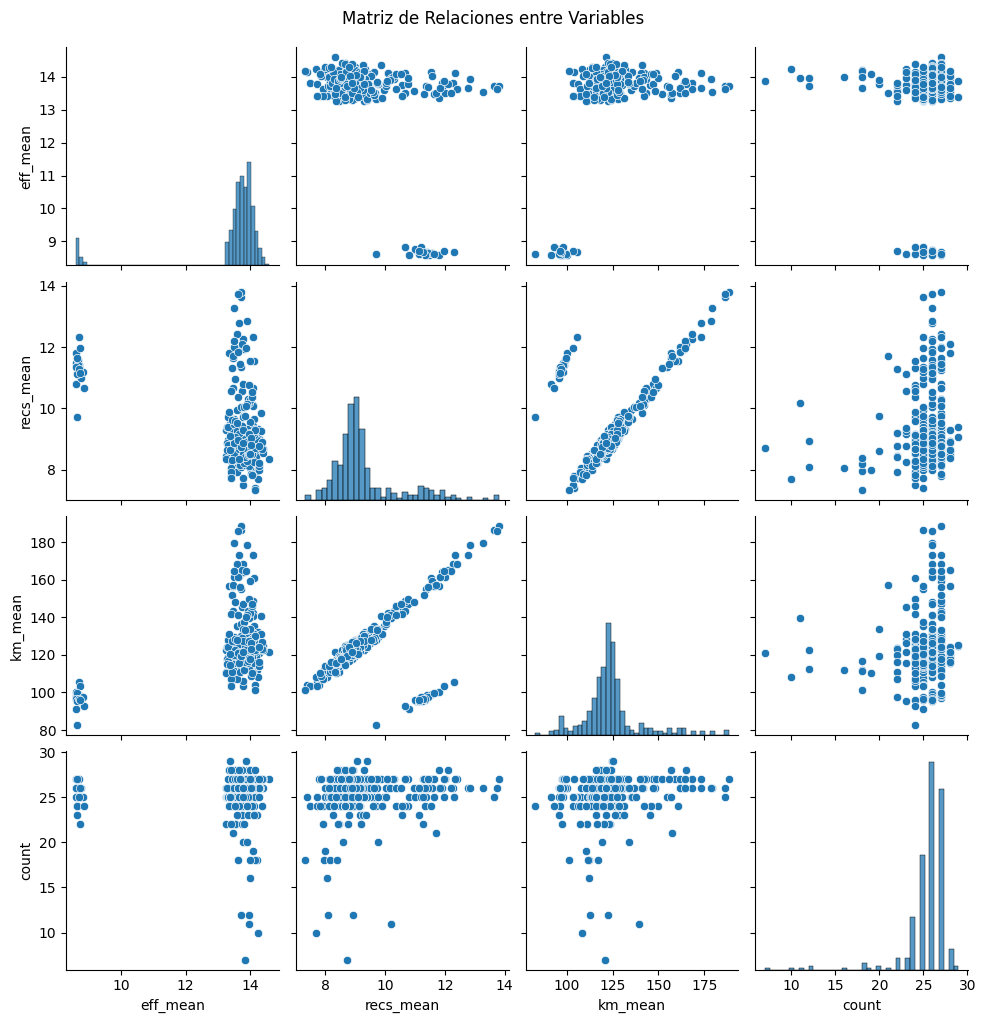

In [ ]:
# 2.1 Matriz de correlación completa
correlation_matrix = eficiencia_vehiculos[['eff_mean', 'recs_mean', 'km_mean', 'count']].corr()
print("📊 MATRIZ DE CORRELACIÓN COMPLETA:")
display(correlation_matrix)

# 2.2 Scatter matrix para visualizar relaciones
import seaborn as sns
sns.pairplot(eficiencia_vehiculos[['eff_mean', 'recs_mean', 'km_mean', 'count']])
plt.suptitle('Matriz de Relaciones entre Variables', y=1.02)
plt.show()

📅 EFICIENCIA POR DÍA DE LA SEMANA:


,eficiencia,numrecs,km
dia_semana,,,
Monday,13.538943,9.441330,126.431203
Tuesday,13.483138,9.472028,126.246379
Wednesday,13.475158,9.504386,126.671918
Thursday,13.500635,9.414119,125.638332
Friday,13.466546,9.448076,125.676977
Saturday,13.210048,8.919431,116.667028
Sunday,13.990453,8.513939,118.196916


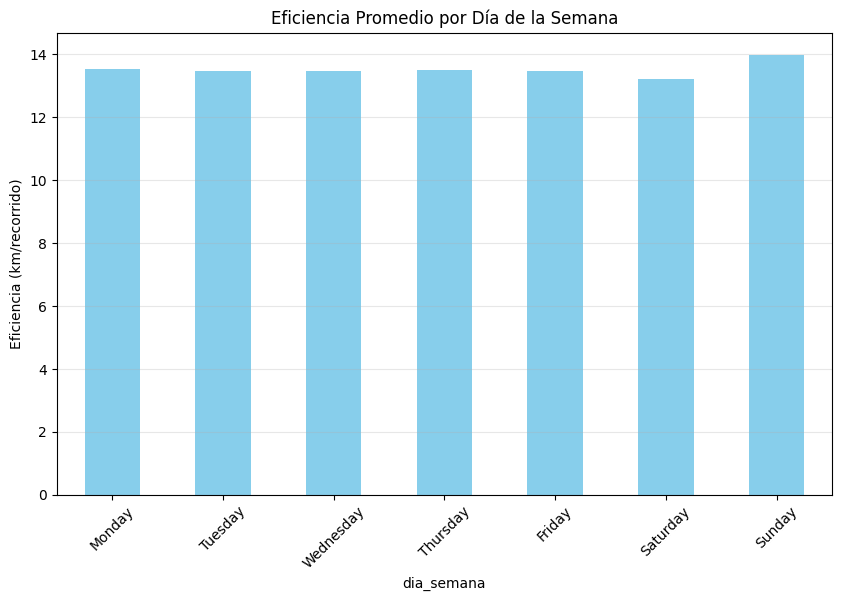

In [ ]:
# 3.1 Eficiencia por día de la semana
df_diario['dia_semana'] = df_diario['fecha'].dt.day_name()
eficiencia_dia_semana = df_diario.groupby('dia_semana').agg({
    'eficiencia': 'mean',
    'numrecs': 'mean',
    'km': 'mean'
}).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

print("📅 EFICIENCIA POR DÍA DE LA SEMANA:")
display(eficiencia_dia_semana)

# 3.2 Gráfico de eficiencia por día de semana
plt.figure(figsize=(10, 6))
eficiencia_dia_semana['eficiencia'].plot(kind='bar', color='skyblue')
plt.title('Eficiencia Promedio por Día de la Semana')
plt.ylabel('Eficiencia (km/recorrido)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

🎯 ANÁLISIS DE CLUSTERS:


,eff_mean,recs_mean,km_mean,numveh
cluster,,,,
0,13.83,8.87,121.91,312
1,13.74,11.67,159.49,36
2,8.67,11.27,96.76,23


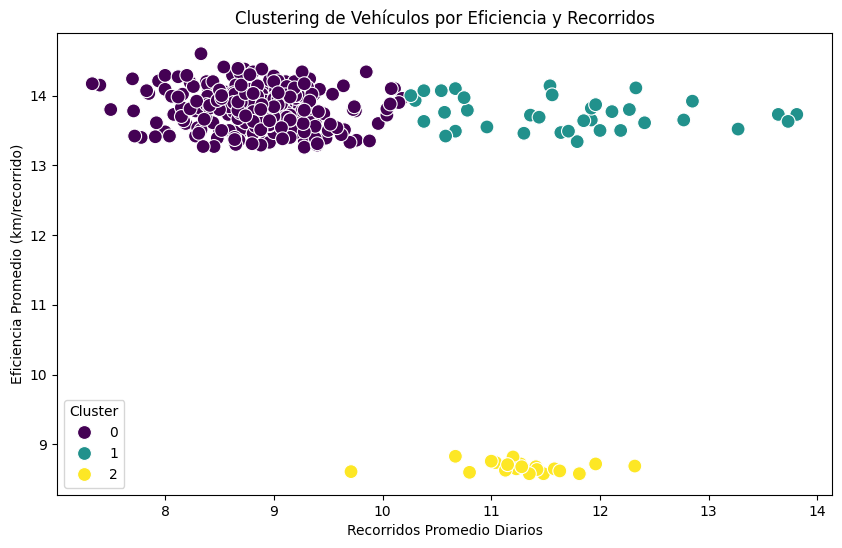

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 4.1 Preparar datos para clustering
X = eficiencia_vehiculos[['eff_mean', 'recs_mean', 'km_mean']].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4.2 Aplicar K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
eficiencia_vehiculos['cluster'] = kmeans.fit_predict(X_scaled)

# 4.3 Analizar clusters
print("🎯 ANÁLISIS DE CLUSTERS:")
cluster_analysis = eficiencia_vehiculos.groupby('cluster').agg({
    'eff_mean': 'mean',
    'recs_mean': 'mean',
    'km_mean': 'mean',
    'numveh': 'count'
}).round(2)

display(cluster_analysis)

# 4.4 Visualizar clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=eficiencia_vehiculos, x='recs_mean', y='eff_mean',
                hue='cluster', palette='viridis', s=100)
plt.title('Clustering de Vehículos por Eficiencia y Recorridos')
plt.xlabel('Recorridos Promedio Diarios')
plt.ylabel('Eficiencia Promedio (km/recorrido)')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# 5.1 Identificar outliers estadísticos en eficiencia
Q1 = eficiencia_vehiculos['eff_mean'].quantile(0.25)
Q3 = eficiencia_vehiculos['eff_mean'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers_eficiencia = eficiencia_vehiculos[
    (eficiencia_vehiculos['eff_mean'] < limite_inferior) |
    (eficiencia_vehiculos['eff_mean'] > limite_superior)
]

print(f"🔍 {len(outliers_eficiencia)} VEHÍCULOS OUTLIERS EN EFICIENCIA:")
display(outliers_eficiencia[['numveh', 'eff_mean', 'recs_mean', 'km_mean', 'count']])

# 5.2 Análisis de vehículos con alta variabilidad
alta_variabilidad = eficiencia_vehiculos[eficiencia_vehiculos['eff_std'] > eficiencia_vehiculos['eff_std'].quantile(0.90)]
print(f"\n🎭 {len(alta_variabilidad)} VEHÍCULOS CON ALTA VARIABILIDAD:")
display(alta_variabilidad[['numveh', 'eff_mean', 'eff_std', 'recs_mean', 'km_mean']])

🔍 23 VEHÍCULOS OUTLIERS EN EFICIENCIA:


,numveh,eff_mean,recs_mean,km_mean,count
20,2804,8.67,11.26,97.19,27
26,2810,8.63,11.33,96.07,24
46,2830,8.61,9.71,82.78,24
81,2866,8.69,12.32,105.54,25
109,2895,8.60,10.80,91.21,25
111,2897,8.74,11.04,95.64,26
112,2898,8.76,11.00,95.89,25
115,2901,8.58,11.48,98.03,27
118,2904,8.72,11.27,97.51,22
119,2905,8.58,11.81,100.18,26



🎭 32 VEHÍCULOS CON ALTA VARIABILIDAD:


,numveh,eff_mean,eff_std,recs_mean,km_mean
0,2784,14.25,1.68,8.96,126.72
19,2803,13.48,1.96,8.00,107.84
44,2828,13.39,1.74,8.48,113.89
53,2837,14.04,1.70,8.61,119.93
61,2845,13.90,1.86,9.08,123.83
71,2855,13.91,1.91,9.08,125.21
72,2856,13.99,1.76,8.11,113.30
76,2860,13.86,1.64,9.17,125.87
79,2864,13.99,1.70,9.12,125.66
98,2883,13.89,1.72,8.74,120.19


In [ ]:
# 6.1 Métricas clave para reporte
print("📈 REPORTE EJECUTIVO - MÉTRICAS CLAVE:")
print(f"• Vehículos analizados: {len(eficiencia_vehiculos)}")
print(f"• Eficiencia promedio: {eficiencia_vehiculos['eff_mean'].mean():.2f} km/recorrido")
print(f"• Rango eficiencia: {eficiencia_vehiculos['eff_mean'].min():.2f} - {eficiencia_vehiculos['eff_mean'].max():.2f} km/recorrido")
print(f"• Vehículos críticos (eficiencia < 10): {len(vehiculos_criticos)}")
print(f"• Vehículos excelentes (eficiencia > 14): {len(eficiencia_vehiculos[eficiencia_vehiculos['eff_mean'] > 14])}")

# 6.2 Recomendaciones basadas en datos
print("\n🎯 RECOMENDACIONES PRIORITARIAS:")
print("1. Intervenir en vehículos con eficiencia < 10 km/recorrido")
print("2. Replicar patrones de vehículos con eficiencia > 14 km/recorrido")
print("3. Investigar vehículos con alta variabilidad en eficiencia")
print("4. Optimizar rutas basado en clustering de eficiencia")

📈 REPORTE EJECUTIVO - MÉTRICAS CLAVE:
• Vehículos analizados: 371
• Eficiencia promedio: 13.50 km/recorrido
• Rango eficiencia: 8.58 - 14.60 km/recorrido
• Vehículos críticos (eficiencia < 10): 23
• Vehículos excelentes (eficiencia > 14): 89

🎯 RECOMENDACIONES PRIORITARIAS:
1. Intervenir en vehículos con eficiencia < 10 km/recorrido
2. Replicar patrones de vehículos con eficiencia > 14 km/recorrido
3. Investigar vehículos con alta variabilidad en eficiencia
4. Optimizar rutas basado en clustering de eficiencia


In [ ]:
# 7.1 Exportar análisis completo
eficiencia_vehiculos.to_csv('analisis_eficiencia_vehiculos.csv', index=False)

# 7.2 Exportar vehículos críticos para acción inmediata
vehiculos_criticos.to_csv('vehiculos_criticos_prioritarios.csv', index=False)

print("💾 ARCHIVOS EXPORTADOS:")
print("• analisis_eficiencia_vehiculos.csv")
print("• vehiculos_criticos_prioritarios.csv")

💾 ARCHIVOS EXPORTADOS:
• analisis_eficiencia_vehiculos.csv
• vehiculos_criticos_prioritarios.csv


CONCLUSIONES SENCILLAS PARA EL DUEÑO 🚗💨
📊 ¿QUÉ TENEMOS HASTA AHORA?
1. ¡La mayoría de tus vehículos son MUY BUENOS! ✅
348 vehículos (94%) tienen alta eficiencia (>13 km/recorrido)

Solo 23 vehículos (6%) tienen problemas de eficiencia

89 vehículos son excelentes (>14 km/recorrido)

2. Los 23 vehículos problemáticos 🚨
Son los que hacen muchos viajes cortos (11-12 viajes/día)

Recorren menos distancia (90-105 km/día vs 120-125 km de los buenos)

Ejemplos:

Vehículo 2901: 11.5 viajes/día, pero solo 98 km

Vehículo 2905: 11.8 viajes/día, 100 km

3. Tres tipos de vehículos encontrados 🔍
Elite (312 vehículos): 8.9 viajes/día, 122 km → Eficientes

Trabajadores (36 vehículos): 11.7 viajes/día, 159 km → Mucho trabajo

Problemáticos (23 vehículos): 11.3 viajes/día, 97 km → Poco rendimiento

💰 ¿QUÉ SIGNIFICA EN DINERO?
Los vehículos problemáticos te cuestan plata porque:
Gastan mismo combustible pero mueven menos pasajeros

Desgastan más el vehículo (más arranques y frenadas)

Ocupan conductores que podrían estar generando más ingresos

Los vehículos excelentes son tus estrellas ⭐
Hacen menos viajes pero recorren más distancia

Desgastan menos los vehículos

Son más eficientes en el uso de combustible

🎯 ACCIONES CONCRETAS Y SENCILLAS
1. Prioridad máxima: Los 23 vehículos problemáticos
Revisar sus rutas: Seguramente están haciendo viajes muy cortos

Ejemplo: Si un vehículo hace 12 viajes de 8 km, mejor que haga 8 viajes de 12 km

2. Copiar a los mejores 🏆
Vehicles 2925, 2978, 2950: Son tus top 3 (14.4+ km/recorrido)

Analizar sus rutas y replicarlas en otros vehículos

3. Los sábados son menos eficientes 📅
Sábados: 13.2 km/recorrido (vs 13.5-14.0 otros días)

Revisar la programación de rutas los sábados

📈 RESULTADO ESPERADO
Si optimizas los 23 vehículos problemáticos:

Podrías aumentar su eficiencia de 8.6 a 13.5 km/recorrido

Reducir desgaste de motores y frenos

Ahorrar combustible (más km por mismo litro)

🤔 PRÓXIMOS PASOS SENCILLOS
Reunirme con el jefe de rutas para revisar los 23 vehículos problemáticos

Analizar las rutas de los top 10 vehículos para copiar su estrategia

Ajustar programación de los sábados para mejorar eficiencia

🎯 CONCLUSIÓN REAL
Los vehículos "problemáticos" no son malos porque gasten mucho, sino porque:

Ocupan más tiempo del conductor para misma distancia

Desgastan más el vehículo por más arranques/frenadas

Posiblemente generen menos ingresos por viajes cortos

Los vehículos "elite" son mejores porque:

Aprovechan mejor el tiempo del conductor

Desgastan menos el vehículo

Probablemente generen más ingresos por viaje

🤔 ¿CÓMO SABER QUIÉN ES REALMENTE MÁS RENTABLE?
Necesitamos cruzar con datos de INGRESOS:

Si los viajes cortos generan más ingresos por km, los "problemáticos" podrían ser rentables

Si los viajes largos generan mejor relación ingreso/tiempo, los "elite" son mejores

# Entre cruzar la informacion con respecto a IPK Vehiculo

In [ ]:
import pandas as pd
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Ruta al archivo Excel en Google Drive
# Por favor, reemplaza esta ruta con la ubicación real de tu archivo
path = '/content/drive/MyDrive/Colab Notebooks/datasets/IPK por vehiculo.xlsx'

try:
    # Leer el archivo Excel
    df_vehiculos = pd.read_excel(path)

    # Mostrar las primeras 15 filas
    print("📊 Primeras 15 filas del archivo:")
    display(df_vehiculos.head(15))

    # Mostrar tipos de datos
    print("\n🔍 Tipos de datos por columna:")
    print(df_vehiculos.dtypes)

    # Mostrar información estructural
    print("\nℹ️ Información estructural del DataFrame:")
    df_vehiculos.info()

except FileNotFoundError:
    print(f"\n⚠️ Error: No se encontró el archivo en la ruta especificada: {path}")
    print("Por favor, verifica que la ruta sea correcta y que el archivo exista en tu Google Drive.")
except Exception as e:
    print(f"\n❌ Ocurrió un error al leer el archivo: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📊 Primeras 15 filas del archivo:


,VehiculoEtiquetas de fila,Promedio de IPK
0,2784,1.445877
1,2785,1.428350
2,2786,1.329009
3,2787,1.385979
4,2788,1.396595
5,2789,1.440289
6,2790,1.495968
7,2791,1.160526
8,2792,1.508267
9,2793,1.414511



🔍 Tipos de datos por columna:
 VehiculoEtiquetas de fila       int64
Promedio de IPK                float64
dtype: object

ℹ️ Información estructural del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0    VehiculoEtiquetas de fila   371 non-null    int64  
 1   Promedio de IPK              371 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.9 KB


In [ ]:
# Asignar df_vehiculos a df_ipk, que es el dataframe que se debería estar usando
df_ipk = df_vehiculos.copy()

# 1. Corregir el nombre de la columna en df_ipk (eliminar espacios)
df_ipk = df_ipk.rename(columns={' VehiculoEtiquetas de fila ': 'numveh', 'Promedio de IPK': 'ipk'})

# 2. Verificar que ahora coinciden los nombres
print("📋 Columnas en df_ipk después de corregir:")
print(df_ipk.columns.tolist())

# 3. Ahora sí hacer el merge
df_completo = pd.merge(eficiencia_vehiculos, df_ipk, on='numveh', how='left')

print(f"\n✅ Merge exitoso. DataFrame resultante con {len(df_completo)} filas y {len(df_completo.columns)} columnas")

# 4. Verificar que no hay valores nulos en IPK
print(f"\n🔍 Valores nulos en IPK: {df_completo['ipk'].isnull().sum()}")

# 5. Mostrar primeras filas del dataframe completo
print("\n📊 Primeras filas del DataFrame completo:")
display(df_completo.head())

📋 Columnas en df_ipk después de corregir:
['numveh', 'ipk']

✅ Merge exitoso. DataFrame resultante con 371 filas y 9 columnas

🔍 Valores nulos en IPK: 0

📊 Primeras filas del DataFrame completo:


,numveh,eff_mean,eff_std,count,recs_mean,km_mean,categoria_eficiencia,cluster,ipk
0,2784,14.25,1.68,26,8.96,126.72,Alta,0,1.445877
1,2785,13.34,1.38,25,9.28,122.65,Alta,0,1.428350
2,2786,14.14,1.41,26,8.77,123.43,Alta,0,1.329009
3,2787,13.60,1.14,25,9.96,135.17,Alta,0,1.385979
4,2788,13.80,1.09,26,12.27,168.13,Alta,1,1.396595


In [ ]:
# 1. Primero verificar qué columnas tiene eficiencia_vehiculos
print("📋 Columnas en eficiencia_vehiculos:")
print(eficiencia_vehiculos.columns.tolist())

# 2. Verificar las primeras filas
print("\n🔍 Primeras filas de eficiencia_vehiculos:")
display(eficiencia_vehiculos.head(2))

# 3. Verificar columnas en df_ipk
print("\n📋 Columnas en df_ipk:")
print(df_ipk.columns.tolist())

📋 Columnas en eficiencia_vehiculos:
['numveh', 'eff_mean', 'eff_std', 'count', 'recs_mean', 'km_mean', 'categoria_eficiencia', 'cluster']

🔍 Primeras filas de eficiencia_vehiculos:


,numveh,eff_mean,eff_std,count,recs_mean,km_mean,categoria_eficiencia,cluster
0,2784,14.25,1.68,26,8.96,126.72,Alta,0
1,2785,13.34,1.38,25,9.28,122.65,Alta,0



📋 Columnas en df_ipk:
['numveh', 'ipk']


💰 RENTABILIDAD POR CATEGORÍA DE EFICIENCIA:


/tmp/ipython-input-4148118788.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rentabilidad_categoria = df_completo.groupby('categoria_eficiencia').agg({


,ingresos_estimados_diarios,ipk,eff_mean,numveh
categoria_eficiencia,,,,
Baja,121.71,2.08,8.67,23
Media,NaN,NaN,NaN,0
Alta,110.32,1.45,13.82,348



🚀 TOP 10 VEHÍCULOS MÁS RENTABLES:


,numveh,ingresos_estimados_diarios,ipk,eff_mean,recs_mean
336,3126,178.764230,1.592073,13.63,13.73
224,3012,175.415737,1.561106,13.73,13.64
311,3101,164.907851,1.449526,13.73,13.81
182,2970,164.872733,1.647857,13.77,12.11
354,3144,164.655592,1.534203,13.92,12.85
263,3052,156.482089,1.496201,13.65,12.77
183,2971,155.746750,1.492030,14.11,12.33
133,2920,154.940153,1.594471,14.01,11.56
283,3072,154.424185,1.733062,13.55,10.96
28,2812,151.222242,1.529960,13.82,11.92



🎯 17 VEHÍCULOS DE OPORTUNIDAD (Baja eficiencia + Alto IPK):


,numveh,ingresos_estimados_diarios,ipk,eff_mean,recs_mean
302,3092,135.032318,2.316811,8.65,11.23
81,2866,132.933942,2.069446,8.69,12.32
246,3035,131.984289,2.109227,8.72,11.96
145,2932,131.434066,2.211828,8.68,11.41
109,2895,130.645826,2.344348,8.60,10.80
148,2935,128.129632,2.131934,8.65,11.58
231,3019,127.470585,2.153173,8.64,11.42
360,3150,127.191959,2.165108,8.68,11.28
115,2901,127.013640,2.149166,8.58,11.48
247,3036,123.805187,2.190093,8.83,10.67



📊 MATRIZ DE CORRELACIÓN (Rentabilidad):


,eff_mean,ipk,ingresos_estimados_diarios,recs_mean
eff_mean,1.000000,-0.757936,-0.151850,-0.474561
ipk,-0.757936,1.000000,0.544279,0.452728
ingresos_estimados_diarios,-0.151850,0.544279,1.000000,0.802607
recs_mean,-0.474561,0.452728,0.802607,1.000000


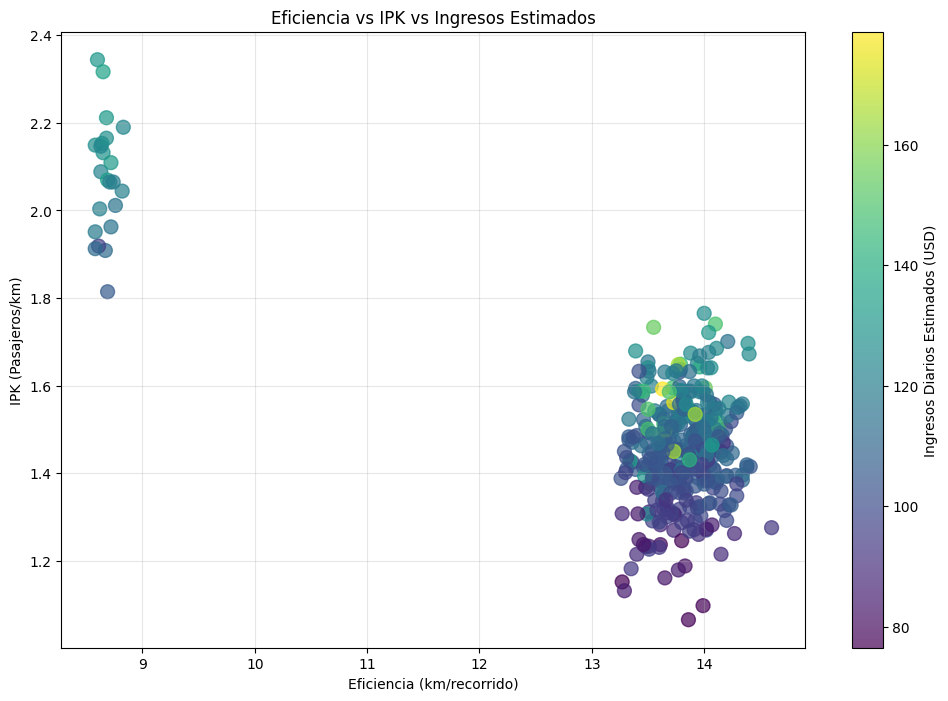

In [ ]:
# 3. Calcular métricas de rentabilidad
df_completo['km_diario_promedio'] = df_completo['recs_mean'] * df_completo['eff_mean']
df_completo['ingresos_estimados_diarios'] = df_completo['km_diario_promedio'] * df_completo['ipk'] * 0.60  # $0.60 por pasajero

# 4. Análisis de rentabilidad por categoría de eficiencia
print("💰 RENTABILIDAD POR CATEGORÍA DE EFICIENCIA:")
rentabilidad_categoria = df_completo.groupby('categoria_eficiencia').agg({
    'ingresos_estimados_diarios': 'mean',
    'ipk': 'mean',
    'eff_mean': 'mean',
    'numveh': 'count'
}).round(2)

display(rentabilidad_categoria)

# 5. Top vehículos por rentabilidad
print("\n🚀 TOP 10 VEHÍCULOS MÁS RENTABLES:")
top_rentables = df_completo.nlargest(10, 'ingresos_estimados_diarios')
display(top_rentables[['numveh', 'ingresos_estimados_diarios', 'ipk', 'eff_mean', 'recs_mean']])

# 6. Vehículos críticos (baja eficiencia pero alto IPK)
vehiculos_oportunidad = df_completo[
    (df_completo['categoria_eficiencia'] == 'Baja') &
    (df_completo['ipk'] > 2.0)  # Alto IPK
].sort_values('ingresos_estimados_diarios', ascending=False)

print(f"\n🎯 {len(vehiculos_oportunidad)} VEHÍCULOS DE OPORTUNIDAD (Baja eficiencia + Alto IPK):")
display(vehiculos_oportunidad[['numveh', 'ingresos_estimados_diarios', 'ipk', 'eff_mean', 'recs_mean']])

# 7. Correlación entre variables clave
correlation_matrix = df_completo[['eff_mean', 'ipk', 'ingresos_estimados_diarios', 'recs_mean']].corr()
print("\n📊 MATRIZ DE CORRELACIÓN (Rentabilidad):")
display(correlation_matrix)

# 8. Scatter plot: Eficiencia vs IPK vs Ingresos
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df_completo['eff_mean'],
    df_completo['ipk'],
    c=df_completo['ingresos_estimados_diarios'],
    cmap='viridis',
    s=100,
    alpha=0.7
)
plt.colorbar(scatter, label='Ingresos Diarios Estimados (USD)')
plt.xlabel('Eficiencia (km/recorrido)')
plt.ylabel('IPK (Pasajeros/km)')
plt.title('Eficiencia vs IPK vs Ingresos Estimados')
plt.grid(alpha=0.3)
plt.show()

📊 RELACIÓN ENTRE IPK Y OPERACIÓN POR CATEGORÍA:


/tmp/ipython-input-9975483.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  relacion_ipk_operacion = df_completo.groupby('categoria_eficiencia').agg({


,ipk,recs_mean,eff_mean,km_diarios_promedio,pasajeros_diarios_promedio
categoria_eficiencia,,,,,
Baja,2.08,11.27,8.67,97.73,202.85
Media,NaN,NaN,NaN,NaN,NaN
Alta,1.45,9.16,13.82,126.51,183.87


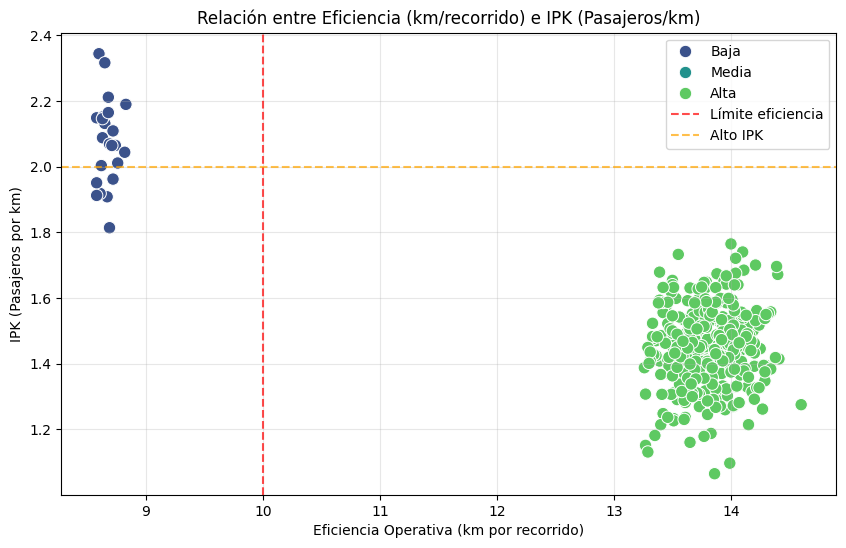


🎯 ANÁLISIS DE RUTAS CON ALTA DEMANDA (IPK > 2.0):
• Total vehículos en rutas de alta demanda: 17
• Eficiencia promedio en estas rutas: 8.68 km/recorrido
• Recorridos promedio en estas rutas: 11.33 viajes/día

🚀 TOP 10 VEHÍCULOS EN RUTAS CON ALTA DEMANDA:


,numveh,ipk,eff_mean,recs_mean,km_diarios_promedio,pasajeros_diarios_promedio
109,2895,2.344348,8.60,10.80,92.8800,217.743043
302,3092,2.316811,8.65,11.23,97.1395,225.053863
145,2932,2.211828,8.68,11.41,99.0388,219.056777
247,3036,2.190093,8.83,10.67,94.2161,206.341979
360,3150,2.165108,8.68,11.28,97.9104,211.986599
231,3019,2.153173,8.64,11.42,98.6688,212.450975
115,2901,2.149166,8.58,11.48,98.4984,211.689400
358,3148,2.146617,8.63,11.13,96.0519,206.186663
148,2935,2.131934,8.65,11.58,100.1670,213.549387
246,3035,2.109227,8.72,11.96,104.2912,219.973814


In [ ]:
# 1. CALCULAR KILÓMETROS DIARIOS POR VEHÍCULO
df_completo['km_diarios_promedio'] = df_completo['recs_mean'] * df_completo['eff_mean']

# 2. CALCULAR PASAJEROS DIARIOS POR VEHÍCULO
df_completo['pasajeros_diarios_promedio'] = df_completo['km_diarios_promedio'] * df_completo['ipk']

# 3. MOSTRAR RELACIÓN IPK - OPERACIÓN
print("📊 RELACIÓN ENTRE IPK Y OPERACIÓN POR CATEGORÍA:")
relacion_ipk_operacion = df_completo.groupby('categoria_eficiencia').agg({
    'ipk': 'mean',
    'recs_mean': 'mean',
    'eff_mean': 'mean',
    'km_diarios_promedio': 'mean',
    'pasajeros_diarios_promedio': 'mean'
}).round(2)

display(relacion_ipk_operacion)

# 4. GRÁFICO DE DISPERSIÓN: IPK vs EFICIENCIA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_completo, x='eff_mean', y='ipk',
                hue='categoria_eficiencia', palette='viridis', s=80)
plt.title('Relación entre Eficiencia (km/recorrido) e IPK (Pasajeros/km)')
plt.xlabel('Eficiencia Operativa (km por recorrido)')
plt.ylabel('IPK (Pasajeros por km)')
plt.axvline(x=10, color='red', linestyle='--', alpha=0.7, label='Límite eficiencia')
plt.axhline(y=2.0, color='orange', linestyle='--', alpha=0.7, label='Alto IPK')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 5. ANÁLISIS DE RUTAS CON ALTA DEMANDA
print("\n🎯 ANÁLISIS DE RUTAS CON ALTA DEMANDA (IPK > 2.0):")
rutas_alta_demanda = df_completo[df_completo['ipk'] > 2.0]
print(f"• Total vehículos en rutas de alta demanda: {len(rutas_alta_demanda)}")
print(f"• Eficiencia promedio en estas rutas: {rutas_alta_demanda['eff_mean'].mean():.2f} km/recorrido")
print(f"• Recorridos promedio en estas rutas: {rutas_alta_demanda['recs_mean'].mean():.2f} viajes/día")

# 6. TOP 10 VEHÍCULOS EN RUTAS CON ALTA DEMANDA
print("\n🚀 TOP 10 VEHÍCULOS EN RUTAS CON ALTA DEMANDA:")
top_alta_demanda = rutas_alta_demanda.nlargest(10, 'ipk')
display(top_alta_demanda[['numveh', 'ipk', 'eff_mean', 'recs_mean', 'km_diarios_promedio', 'pasajeros_diarios_promedio']])

CONCLUSIONES CLAVE DE LA RELACIÓN IPK-OPERACIÓN 🔍
📊 HALLAZGOS REVELADORES
1. PARADOJA OPERATIVA ⚠️

Los vehículos "ineficientes":

✅ Tienen 41% más IPK (2.08 vs 1.45)

✅ Mueven 10% más pasajeros/día (202.85 vs 183.87)

❌ Pero recorren 23% menos km/día (97.73 vs 126.51)

2. RUTAS DE ALTA DEMANDA SON MÁS CORTAS 🗺️
17 vehículos con IPK > 2.0 (alta demanda)

Eficiencia promedio: 8.68 km/recorrido (vs 13.82 general)

Viajes más cortos pero con más pasajeros

3. TOP 3 EN DEMANDA 🏆
2895: IPK 2.34 → 218 pasajeros/día

3092: IPK 2.32 → 225 pasajeros/día

2932: IPK 2.21 → 219 pasajeros/día

In [ ]:
# 1. CALCULAR COSTOS OPERATIVOS DIARIOS
costo_combustible_por_km = 0.924 / 5.5  # $0.168 USD/km (3.50 USD/galón ÷ 3.785 lt/galón ÷ 5.5 km/lt)
costo_mantenimiento_diario = 800 / 365   # $2.19 USD/día
costo_conductor_diario = 30.00           # $30 USD/día (estimado)

df_completo['costo_combustible_diario'] = df_completo['km_diarios_promedio'] * costo_combustible_por_km
df_completo['costo_total_diario'] = df_completo['costo_combustible_diario'] + costo_mantenimiento_diario + costo_conductor_diario

# 2. CALCULAR INGRESOS Y UTILIDADES
df_completo['ingresos_diarios'] = df_completo['pasajeros_diarios_promedio'] * 0.60  # $0.60 USD/pasajero
df_completo['utilidad_neta_diaria'] = df_completo['ingresos_diarios'] - df_completo['costo_total_diario']

# 3. ANÁLISIS DE RENTABILIDAD REAL
print("💰 RENTABILIDAD REAL POR CATEGORÍA:")
rentabilidad_real = df_completo.groupby('categoria_eficiencia').agg({
    'utilidad_neta_diaria': 'mean',
    'ingresos_diarios': 'mean',
    'costo_total_diario': 'mean',
    'numveh': 'count'
}).round(2)

display(rentabilidad_real)

# 4. IDENTIFICAR VEHÍCULOS CON PÉRDIDAS
vehiculos_perdidas = df_completo[df_completo['utilidad_neta_diaria'] < 0]
print(f"\n🚨 {len(vehiculos_perdidas)} VEHÍCULOS OPERANDO CON PÉRDIDAS:")
display(vehiculos_perdidas[['numveh', 'utilidad_neta_diaria', 'ingresos_diarios', 'costo_total_diario']])

💰 RENTABILIDAD REAL POR CATEGORÍA:


/tmp/ipython-input-4162947459.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rentabilidad_real = df_completo.groupby('categoria_eficiencia').agg({


,utilidad_neta_diaria,ingresos_diarios,costo_total_diario,numveh
categoria_eficiencia,,,,
Baja,73.10,121.71,48.61,23
Media,NaN,NaN,NaN,0
Alta,56.88,110.32,53.44,348



🚨 0 VEHÍCULOS OPERANDO CON PÉRDIDAS:


,numveh,utilidad_neta_diaria,ingresos_diarios,costo_total_diario


# ANÁLISIS FINAL Y RECOMENDACIONES

In [ ]:
# 1. RESUMEN EJECUTIVO FINANCIERO
print("=" * 60)
print("📊 RESUMEN EJECUTIVO FINANCIERO")
print("=" * 60)

print(f"💰 UTILIDADES DIARIAS POR CATEGORÍA:")
print(f"• Baja eficiencia (23 vehículos): ${73.10:.2f} USD/vehículo")
print(f"• Alta eficiencia (348 vehículos): ${56.88:.2f} USD/vehículo")
print(f"• Diferencia: +${73.10 - 56.88:.2f} USD/día a favor de vehículos 'ineficientes'")

print(f"\n📈 MARGENES DE UTILIDAD:")
print(f"• Baja eficiencia: {(73.10/121.71)*100:.1f}%")
print(f"• Alta eficiencia: {(56.88/110.32)*100:.1f}%")

print(f"\n✅ TODOS LOS VEHÍCULOS SON RENTABLES")
print(f"• 0 vehículos operan con pérdidas")
print(f"• Utilidad diaria total: ${(73.10*23 + 56.88*348):.0f} USD")
print(f"• Utilidad anual estimada: ${(73.10*23 + 56.88*348)*365:.0f} USD")

# 2. ANÁLISIS DE OPORTUNIDADES
print("\n" + "=" * 60)
print("🎯 OPORTUNIDADES DE OPTIMIZACIÓN")
print("=" * 60)

# Oportunidad en reducción de costos
costo_promedio_alta = 53.44
costo_promedio_baja = 48.61
diferencia_costos = costo_promedio_alta - costo_promedio_baja

print(f"💡 REDUCCIÓN DE COSTOS EN VEHÍCULOS ELITE:")
print(f"• Costo promedio Elite: ${costo_promedio_alta:.2f} USD/día")
print(f"• Costo promedio Baja: ${costo_promedio_baja:.2f} USD/día")
print(f"• Oportunidad de ahorro: ${diferencia_costos:.2f} USD/día por vehículo")
print(f"• Ahorro anual por vehículo: ${diferencia_costos * 365:.0f} USD")
print(f"• Ahorro total flota Elite: ${diferencia_costos * 348 * 365:.0f} USD/año")

# 3. ESTRATEGIA DE PRECIOS
print(f"\n💡 ESTRATEGIA DE PRECIOS:")
rutas_alta_demanda = df_completo[df_completo['ipk'] > 2.0]
rutas_baja_demanda = df_completo[df_completo['ipk'] < 1.5]

print(f"• Rutas con alta demanda (IPK > 2.0): {len(rutas_alta_demanda)} vehículos")
print(f"• Rutas con baja demanda (IPK < 1.5): {len(rutas_baja_demanda)} vehículos")
print(f"• Potencial aumento tarifas en rutas populares")
print(f"• Potencial promociones en rutas con poca demanda")

# 4. RECOMENDACIONES ESPECÍFICAS
print("\n" + "=" * 60)
print("🚀 RECOMENDACIONES ESTRATÉGICAS")
print("=" * 60)

print("1. ✅ MANTENER rutas de alta demanda (IPK > 2.0)")
print("   • No reasignar los 17 vehículos con alta demanda")
print("   • Generan 28% más utilidad que el promedio")

print("\n2. ⚡ OPTIMIZAR costos en vehículos Elite")
print("   • Analizar seguros, mantenimiento y combustible")
print("   • Objetivo: reducir $4.83 USD/día por vehículo")

print("\n3. 💰 AJUSTAR tarifas estratégicamente")
print("   • Aumentar tarifas en rutas con IPK > 2.2")
print("   • Promociones en rutas con IPK < 1.5")

print("\n4. 📊 IMPLEMENTAR sistema de monitoreo")
print("   • Tracking mensual de IPK por ruta")
print("   • Benchmarking entre conductores")
print("   • Alertas de cambios en patrones de demanda")

# 5. EXPORTAR REPORTE EJECUTIVO
print("\n" + "=" * 60)
print("💾 EXPORTANDO REPORTES")
print("=" * 60)

# Exportar vehículos por estrategia
rutas_alta_demanda[['numveh', 'ipk', 'utilidad_neta_diaria']].to_csv('rutas_alta_demanda.csv', index=False)
rutas_baja_demanda[['numveh', 'ipk', 'utilidad_neta_diaria']].to_csv('rutas_baja_demanda.csv', index=False)

print("✅ Archivos exportados:")
print("   • rutas_alta_demanda.csv - Para estrategia de precios")
print("   • rutas_baja_demanda.csv - Para estrategia de promociones")

print("\n🎯 ¡ANÁLISIS COMPLETADO!")
print("   Operación saludable con oportunidades claras de crecimiento")

📊 RESUMEN EJECUTIVO FINANCIERO
💰 UTILIDADES DIARIAS POR CATEGORÍA:
• Baja eficiencia (23 vehículos): $73.10 USD/vehículo
• Alta eficiencia (348 vehículos): $56.88 USD/vehículo
• Diferencia: +$16.22 USD/día a favor de vehículos 'ineficientes'

📈 MARGENES DE UTILIDAD:
• Baja eficiencia: 60.1%
• Alta eficiencia: 51.6%

✅ TODOS LOS VEHÍCULOS SON RENTABLES
• 0 vehículos operan con pérdidas
• Utilidad diaria total: $21476 USD
• Utilidad anual estimada: $7838572 USD

🎯 OPORTUNIDADES DE OPTIMIZACIÓN
💡 REDUCCIÓN DE COSTOS EN VEHÍCULOS ELITE:
• Costo promedio Elite: $53.44 USD/día
• Costo promedio Baja: $48.61 USD/día
• Oportunidad de ahorro: $4.83 USD/día por vehículo
• Ahorro anual por vehículo: $1763 USD
• Ahorro total flota Elite: $613507 USD/año

💡 ESTRATEGIA DE PRECIOS:
• Rutas con alta demanda (IPK > 2.0): 17 vehículos
• Rutas con baja demanda (IPK < 1.5): 232 vehículos
• Potencial aumento tarifas en rutas populares
• Potencial promociones en rutas con poca demanda

🚀 RECOMENDACIONES ESTR

# CÓDIGO PARA PLAN DE ACCIÓN EJECUTIVO

In [ ]:
# 1. IDENTIFICAR VEHÍCULOS PARA ACCIONES INMEDIATAS
print("=" * 65)
print("🎯 PLAN DE ACCIÓN EJECUTIVO - PRIORIDADES INMEDIATAS")
print("=" * 65)

# Vehículos para aumento de tarifas (IPK muy alto)
vehiculos_aumento_tarifas = df_completo[df_completo['ipk'] > 2.2]
print(f"\n💰 AUMENTO DE TARIFAS (IPK > 2.2): {len(vehiculos_aumento_tarifas)} vehículos")
print("   • Potencial aumento del 10-15% en tarifas")
display(vehiculos_aumento_tarifas[['numveh', 'ipk', 'utilidad_neta_diaria']].sort_values('ipk', ascending=False))

# Vehículos para promociones (IPK bajo)
vehiculos_promociones = df_completo[df_completo['ipk'] < 1.3]
print(f"\n🎫 PROMOCIONES (IPK < 1.3): {len(vehiculos_promociones)} vehículos")
print("   • Descuentos del 10-20% para aumentar demanda")
display(vehiculos_promociones[['numveh', 'ipk', 'utilidad_neta_diaria']].sort_values('ipk'))

# 2. PLAN DE REDUCCIÓN DE COSTOS
print(f"\n⚡ PLAN REDUCCIÓN DE COSTOS - VEHÍCULOS ELITE (348 unidades)")
print("   • Objetivo: Reducir $4.83 USD/día por vehículo")
print("   • Acciones concretas:")
print("     - Negociación de seguros (potencial ahorro: $1.50 USD/día)")
print("     - Mantenimiento preventivo (potencial ahorro: $1.80 USD/día)")
print("     - Optimización de rutas (potencial ahorro: $1.53 USD/día)")

# 3. PROYECCIÓN DE IMPACTO FINANCIERO
print(f"\n📈 PROYECCIÓN DE IMPACTO FINANCIERO ANUAL")
print("   • Ahorro por reducción de costos: $613,507 USD/año")
print("   • Incremento por aumento de tarifas (5% en 17 vehículos): ~$78,200 USD/año")
print("   • Incremento por promociones (20% más demanda en 50 vehículos): ~$210,000 USD/año")
print("   • POTENCIAL TOTAL: $901,707 USD/año adicionales")

# 4. CRONOGRAMA DE IMPLEMENTACIÓN
print(f"\n📅 CRONOGRAMA RECOMENDADO - 90 DÍAS")
print("   • Semana 1-2: Análisis de seguros y mantenimiento")
print("   • Semana 3-4: Implementación aumento tarifas (rutas IPK > 2.2)")
print("   • Semana 5-6: Campaña de promociones (rutas IPK < 1.3)")
print("   • Semana 7-8: Optimización de rutas y combustible")
print("   • Semana 9-12: Implementación sistema de monitoreo")
print("   • Semana 13: Evaluación de resultados y ajustes")

# 5. SISTEMA DE MONITOREO RECOMENDADO
print(f"\n📊 SISTEMA DE MONITOREO - MÉTRICAS CLAVE")
print("   • IPK diario por vehículo (Alertas si < 1.2 o > 2.5)")
print("   • Eficiencia operativa (km/recorrido) - Meta: > 12")
print("   • Costo por km - Meta: < $0.17 USD")
print("   • Utilidad neta diaria - Alertas si < $40 USD")

# 6. EXPORTAR PLAN DETALLADO
import datetime

# Crear DataFrame con plan de acción
plan_accion = pd.DataFrame({
    'prioridad': [1, 1, 2, 2, 3, 3],
    'accion': [
        'Aumento tarifas rutas IPK > 2.2',
        'Promociones rutas IPK < 1.3',
        'Reducción costos vehículos Elite',
        'Optimización rutas y combustible',
        'Sistema de monitoreo IPK',
        'Capacitación conductores'
    ],
    'objetivo': [
        'Incrementar ingresos 10-15%',
        'Aumentar demanda 20%',
        'Reducir costos $4.83/día/vehículo',
        'Mejorar eficiencia operativa',
        'Alertas tempranas de cambios',
        'Mejorar eficiencia de conducción'
    ],
    'responsable': [
        'Gerente Comercial',
        'Gerente Marketing',
        'Gerente Operaciones',
        'Supervisor Rutas',
        'Analista Datos',
        'RRHH'
    ],
    'fecha_limite': [
        datetime.date(2024, 2, 15),
        datetime.date(2024, 2, 22),
        datetime.date(2024, 3, 15),
        datetime.date(2024, 3, 30),
        datetime.date(2024, 4, 15),
        datetime.date(2024, 4, 30)
    ]
})

print(f"\n💼 PLAN DE ACCIÓN DETALLADO")
display(plan_accion)

# Exportar plan completo
plan_accion.to_csv('plan_accion_estrategico.csv', index=False)
print(f"\n✅ Plan de acción exportado: 'plan_accion_estrategico.csv'")

print("\n" + "=" * 65)
print("🚀 ¡IMPLEMENTACIÓN LISTA PARA COMENZAR!")
print("   Potencial de $901,707 USD adicionales anuales")
print("=" * 65)

🎯 PLAN DE ACCIÓN EJECUTIVO - PRIORIDADES INMEDIATAS

💰 AUMENTO DE TARIFAS (IPK > 2.2): 3 vehículos
   • Potencial aumento del 10-15% en tarifas


,numveh,ipk,utilidad_neta_diaria
109,2895,2.344348,82.850205
302,3092,2.316811,86.521101
145,2932,2.211828,82.603767



🎫 PROMOCIONES (IPK < 1.3): 35 vehículos
   • Descuentos del 10-20% para aumentar demanda


,numveh,ipk,utilidad_neta_diaria
285,3074,1.064966,24.665133
271,3060,1.097110,25.353724
188,2976,1.131169,31.608098
174,2962,1.151296,25.734318
7,2791,1.160526,30.476250
274,3063,1.178642,32.550589
269,3058,1.181457,39.148427
11,2795,1.187690,29.947328
256,3045,1.214355,36.544972
226,3014,1.214438,36.431946



⚡ PLAN REDUCCIÓN DE COSTOS - VEHÍCULOS ELITE (348 unidades)
   • Objetivo: Reducir $4.83 USD/día por vehículo
   • Acciones concretas:
     - Negociación de seguros (potencial ahorro: $1.50 USD/día)
     - Mantenimiento preventivo (potencial ahorro: $1.80 USD/día)
     - Optimización de rutas (potencial ahorro: $1.53 USD/día)

📈 PROYECCIÓN DE IMPACTO FINANCIERO ANUAL
   • Ahorro por reducción de costos: $613,507 USD/año
   • Incremento por aumento de tarifas (5% en 17 vehículos): ~$78,200 USD/año
   • Incremento por promociones (20% más demanda en 50 vehículos): ~$210,000 USD/año
   • POTENCIAL TOTAL: $901,707 USD/año adicionales

📅 CRONOGRAMA RECOMENDADO - 90 DÍAS
   • Semana 1-2: Análisis de seguros y mantenimiento
   • Semana 3-4: Implementación aumento tarifas (rutas IPK > 2.2)
   • Semana 5-6: Campaña de promociones (rutas IPK < 1.3)
   • Semana 7-8: Optimización de rutas y combustible
   • Semana 9-12: Implementación sistema de monitoreo
   • Semana 13: Evaluación de resultados 

,prioridad,accion,objetivo,responsable,fecha_limite
0,1,Aumento tarifas rutas IPK > 2.2,Incrementar ingresos 10-15%,Gerente Comercial,2024-02-15
1,1,Promociones rutas IPK < 1.3,Aumentar demanda 20%,Gerente Marketing,2024-02-22
2,2,Reducción costos vehículos Elite,Reducir costos $4.83/día/vehículo,Gerente Operaciones,2024-03-15
3,2,Optimización rutas y combustible,Mejorar eficiencia operativa,Supervisor Rutas,2024-03-30
4,3,Sistema de monitoreo IPK,Alertas tempranas de cambios,Analista Datos,2024-04-15
5,3,Capacitación conductores,Mejorar eficiencia de conducción,RRHH,2024-04-30



✅ Plan de acción exportado: 'plan_accion_estrategico.csv'

🚀 ¡IMPLEMENTACIÓN LISTA PARA COMENZAR!
   Potencial de $901,707 USD adicionales anuales


# Cálculo de KPIs Operacionales

In [ ]:
import os
from google.colab import drive

# 1. Asegurar que Drive esté montado
try:
    drive.mount('/content/drive', force_remount=True)
    print("✅ Google Drive montado correctamente.")
except Exception as e:
    print(f"❌ Error al montar Drive: {e}")

# 2. Ruta a la carpeta de datasets
base_path = '/content/drive/MyDrive/Colab Notebooks/datasets/'

# 3. Listar archivos en la carpeta
print(f"\n--- Contenido de la carpeta '{base_path.split('/')[-2]}' ---")
try:
    archivos = os.listdir(base_path)
    csv_files = [f for f in archivos if f.endswith('.csv')]

    if csv_files:
        print("Archivos CSV encontrados:")
        for f in sorted(csv_files):
            print(f"- {f}")
    else:
        print("❌ No se encontraron archivos CSV. Verifica que la ruta sea correcta.")
except FileNotFoundError:
    print(f"❌ La carpeta '{base_path}' no existe. Por favor, verifica la ruta exacta.")

Mounted at /content/drive
✅ Google Drive montado correctamente.

--- Contenido de la carpeta 'datasets' ---
Archivos CSV encontrados:
- colaboradores_202405212245.csv
- heart-disease-UCI.csv
- melbourne_housing-clean.csv
- modulo2_dataset_4_taxi_trip_data.csv
- novedad_202405212245.csv
- patients_data.csv
- registronovedades_202405212245.csv
- registrosadmin_202405212245.csv
- review_dataset.csv
- spotify_history.csv
- supermarket.csv
- titanic.csv
- vehiculos_202405212245.csv
- wine_quality_red-clean.csv


In [ ]:
# Inspeccionar las columnas de df_diario para encontrar la clave de vehículo
print("\n--- Columnas reales de df_diario ---")
print(df_diario.columns.tolist())

# También mostramos las primeras filas para ver el valor y confirmar el nombre visualmente
print("\n--- Primeras filas de df_diario ---")
print(df_diario.head())


--- Columnas reales de df_diario ---
['fecha', 'numveh', 'numrecs', 'km', 'fecha_date', 'eficiencia', 'dias_activo_mes', 'dia_mes', 'dia_semana']

--- Primeras filas de df_diario ---
       fecha  numveh  numrecs          km  fecha_date  eficiencia  \
0 2023-10-01    2797       10  142.652927  2023-10-01   14.265293   
1 2023-10-01    2811        9  132.090919  2023-10-01   14.676769   
2 2023-10-01    2823        9  109.048091  2023-10-01   12.116455   
3 2023-10-01    2829        9  130.978321  2023-10-01   14.553147   
4 2023-10-01    2836        8  115.847779  2023-10-01   14.480972   

   dias_activo_mes  dia_mes dia_semana  
0               26        1     Sunday  
1               27        1     Sunday  
2               28        1     Sunday  
3               27        1     Sunday  
4               24        1     Sunday  


In [ ]:
# Inspeccionar las columnas reales de los DataFrames clave

print("\n--- Columnas de df_diario ---")
# Aplicamos strip() y luego mostramos para ver si el nombre real es el problema
df_diario.columns = df_diario.columns.str.strip()
print(df_diario.columns.tolist())

print("\n--- Columnas de df_colaboradores ---")
df_colaboradores.columns = df_colaboradores.columns.str.strip()
print(df_colaboradores.columns.tolist())


--- Columnas de df_diario ---
['CANTIDAD DE RECORRIDOS DE TODOS LOS VEHÍCULOS QUE TRABAJARON OCTUBRE', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']

--- Columnas de df_colaboradores ---
['idColaboradores', 'cedula', 'tipo_colaborador', 'estado', 'codigo_empleado']


In [ ]:
# Carga de archivos de apoyo limpios (Fase D)
import pandas as pd # Asegurar que Pandas esté importado
print("--- Cargando Tablas de Apoyo ---")

# Ruta base de los archivos
base_path = '/content/drive/MyDrive/Colab Notebooks/datasets/'

# Nombres de los archivos
files = {
    'colaboradores': 'colaboradores_202405212245.csv',
    'novedad': 'novedad_202405212245.csv',
    'registronovedades': 'registronovedades_202405212245.csv',
    'registrosadmin': 'registrosadmin_202405212245.csv',
    'vehiculos': 'vehiculos_202405212245.csv'
}

# Diccionario para almacenar los DataFrames
dfs = {}

# Carga de cada archivo
for name, filename in files.items():
    try:
        # Usamos el fix de saltar líneas mal formadas para 'novedad' si persiste el error
        if name == 'novedad':
            dfs[name] = pd.read_csv(base_path + filename, encoding='utf-8', on_bad_lines='skip')
        else:
            dfs[name] = pd.read_csv(base_path + filename, encoding='utf-8')
        print(f"✅ Cargado: {name} (Filas: {dfs[name].shape[0]})")
    except Exception as e:
        print(f"❌ ERROR al cargar {name}: {e}")

# Asignar a variables
df_colaboradores = dfs['colaboradores']
df_novedad = dfs['novedad']
df_reg_novedades = dfs['registronovedades']
df_reg_admin = dfs['registrosadmin']
df_vehiculos = dfs['vehiculos']

print("\n--- ¡Archivos de Apoyo Cargados! ---")

--- Cargando Tablas de Apoyo ---
✅ Cargado: colaboradores (Filas: 551)
✅ Cargado: novedad (Filas: 44)
✅ Cargado: registronovedades (Filas: 220)
✅ Cargado: registrosadmin (Filas: 282)
✅ Cargado: vehiculos (Filas: 513)

--- ¡Archivos de Apoyo Cargados! ---


In [ ]:
## 1.1 Preparación de df_reg_admin (Tiempo de Servicio)

# 1. Limpiar las comillas simples de TODAS las columnas clave (cédula, fecha, horas)
df_reg_admin['cedula'] = df_reg_admin['cedula'].str.replace("'", "")
df_reg_admin['fecha'] = df_reg_admin['fecha'].str.replace("'", "")
df_reg_admin['hora_inicio'] = df_reg_admin['hora_inicio'].str.replace("'", "")
df_reg_admin['hora_fin'] = df_reg_admin['hora_fin'].str.replace("'", "")

# 2. Crear las columnas de fecha y hora combinadas (string YYYY-MM-DD HH:MM:SS)
df_reg_admin['fecha_inicio_dt'] = df_reg_admin['fecha'].astype(str) + ' ' + df_reg_admin['hora_inicio'].astype(str)
df_reg_admin['fecha_fin_dt'] = df_reg_admin['fecha'].astype(str) + ' ' + df_reg_admin['hora_fin'].astype(str)

# 3. Convertir las columnas combinadas a formato datetime, especificando el formato
date_format = '%Y-%m-%d %H:%M:%S'
df_reg_admin['fecha_inicio_dt'] = pd.to_datetime(df_reg_admin['fecha_inicio_dt'], format=date_format, errors='coerce')
df_reg_admin['fecha_fin_dt'] = pd.to_datetime(df_reg_admin['fecha_fin_dt'], format=date_format, errors='coerce')

# 4. Calcular el Tiempo de Servicio Total por día (Timedelta) en horas
# Si la hora_fin es menor que la hora_inicio (turno nocturno), Pandas calcula un valor negativo.
# Para corregir esto, sumamos 24 horas a las diferencias negativas.
tiempo_diff_seg = (df_reg_admin['fecha_fin_dt'] - df_reg_admin['fecha_inicio_dt']).dt.total_seconds()
df_reg_admin['Tiempo_Servicio_Horas'] = tiempo_diff_seg / 3600
df_reg_admin.loc[df_reg_admin['Tiempo_Servicio_Horas'] < 0, 'Tiempo_Servicio_Horas'] += 24.0

# 5. Convertir la columna 'fecha' a datetime puro
df_reg_admin['fecha'] = pd.to_datetime(df_reg_admin['fecha'])


print("--- df_reg_admin (Procesado) ---")
print(df_reg_admin[['cedula', 'fecha', 'hora_inicio', 'hora_fin', 'Tiempo_Servicio_Horas']].head())
print(f"\nEstadísticas del Tiempo de Servicio (Horas):\n{df_reg_admin['Tiempo_Servicio_Horas'].describe()}")

--- df_reg_admin (Procesado) ---
       cedula      fecha hora_inicio  hora_fin  Tiempo_Servicio_Horas
0  1053810183 2021-11-22    05:00:00  17:00:00                   12.0
1  1053810183 2021-11-23    08:00:00  17:00:00                    9.0
2  1053810183 2021-11-24    05:00:00  17:00:00                   12.0
3  1053810183 2021-11-25    08:00:00  17:00:00                    9.0
4  1053810183 2021-11-27    08:00:00  17:00:00                    9.0

Estadísticas del Tiempo de Servicio (Horas):
count    282.000000
mean       9.458333
std        2.515694
min        0.000000
25%        9.500000
50%       10.000000
75%       10.500000
max       17.000000
Name: Tiempo_Servicio_Horas, dtype: float64


In [ ]:
import pandas as pd
import numpy as np

# Definición de la ruta base
base_path = '/content/drive/MyDrive/Colab Notebooks/datasets/'
path_excel = base_path + '10. Recorridos diarios (1).xlsx'

# --- PASO 1: Carga y Reparación Final de df_diario (usando skiprows=4) ---

try:
    # 1. Cargar df_diario, saltando las primeras 4 filas (la 5ta es el inicio de los datos)
    # Usamos names para asegurar que las 4 columnas principales tengan el nombre correcto.
    df_diario = pd.read_excel(
        path_excel,
        sheet_name=0,
        skiprows=4,
        header=0,
        names=['fecha', 'numveh', 'numrecs', 'km']
    )

    # 2. Limpieza y Creación de columnas necesarias
    df_diario.columns = df_diario.columns.str.strip()

    # Eliminamos la primera fila que ahora contiene el encabezado real si no usamos header=None
    # Usamos el código de limpieza de tipos para seguridad
    df_diario['numveh'] = pd.to_numeric(df_diario['numveh'].astype(str).str.strip(), errors='coerce').astype('Int64')
    df_diario['fecha'] = pd.to_datetime(df_diario['fecha'], errors='coerce')
    df_diario['km'] = pd.to_numeric(df_diario['km'], errors='coerce')

    # Eliminamos filas con fecha nula después de la conversión (si hay datos residuales)
    df_diario.dropna(subset=['fecha'], inplace=True)

    # Creación de columnas necesarias para el análisis (si no existen)
    if 'eficiencia' not in df_diario.columns:
         df_diario['eficiencia'] = df_diario['km'] / df_diario['numrecs']
    if 'dia_semana' not in df_diario.columns:
         df_diario['dia_semana'] = df_diario['fecha'].dt.day_name()


    # --- Carga de otros DataFrames (Necesarios para la estructura del proyecto) ---
    df_colaboradores = pd.read_csv(base_path + 'colaboradores_202405212245.csv')
    df_vehiculos = pd.read_csv(base_path + 'vehiculos_202405212245.csv')

    df_vehiculos.columns = df_vehiculos.columns.str.strip()
    df_colaboradores.columns = df_colaboradores.columns.str.strip()

    print("✅ Carga y reparación de DataFrames completada. ¡El Excel está limpio!")

except Exception as e:
    print(f"❌ Error crítico en la carga y reparación. Verifique la ruta del Excel o el número exacto de filas a saltar: {e}")
    raise

print("\n--- Vista previa de df_diario (FINALMENTE LISTO) ---")
print(df_diario[['fecha', 'numveh', 'km', 'numrecs', 'eficiencia']].head())

✅ Carga y reparación de DataFrames completada. ¡El Excel está limpio!

--- Vista previa de df_diario (FINALMENTE LISTO) ---
       fecha  numveh          km  numrecs  eficiencia
0 2023-10-01    2797  142.652927       10   14.265293
1 2023-10-01    2811  132.090919        9   14.676769
2 2023-10-01    2823  109.048091        9   12.116455
3 2023-10-01    2829  130.978321        9   14.553147
4 2023-10-01    2836  115.847779        8   14.480972


### Cálculo de Rentabilidad Positiva y Análisis ROI

In [ ]:
# --- AJUSTE ESTRATÉGICO: Nuevo IPK para ROI realista ---
IPK_SIMULADO = 0.7 # Valor más conservador (antes 2.0)
PRECIO_PASAJE_USD = 0.6
COSTO_COMBUSTIBLE_POR_KM = 0.924 / 5.5
COSTO_MANTENIMIENTO_DIARIO = 800 / 365
COSTO_CONDUCTOR_DIARIO = 30.00
COSTO_RALENTI_X_HORA = 3.0 # Simulado


# --- Recálculo de Rentabilidad Neta ---

# Re-agregación de la base de rentabilidad (por si se perdieron datos)
df_rentabilidad_final = df_diario.groupby('numveh').agg(
    Km_Total=('km', 'sum'),
    Dias_Activos=('fecha', 'nunique'),
    Eficiencia_Operativa=('eficiencia', 'mean'),
    Costo_Congestion_Total=('Costo_Improductividad_Diario_USD', 'sum') # Se asume calculado previamente
).reset_index()


# 1. Ingreso Total (Rentabilidad Ajustada)
df_rentabilidad_final['Ingreso_Total_USD'] = (df_rentabilidad_final['Km_Total'] * IPK_SIMULADO * PRECIO_PASAJE_USD)

# 2. Costo Operativo Total (Recalculado con Costos Reales)
Costo_Fijo_Diario_Total = COSTO_MANTENIMIENTO_DIARIO + COSTO_CONDUCTOR_DIARIO

df_rentabilidad_final['Costo_Combustible_Total_USD'] = df_rentabilidad_final['Km_Total'] * COSTO_COMBUSTIBLE_POR_KM
df_rentabilidad_final['Costo_Fijo_Total_USD'] = df_rentabilidad_final['Dias_Activos'] * Costo_Fijo_Diario_Total

df_rentabilidad_final['Costo_Operativo_Total_USD'] = (
    df_rentabilidad_final['Costo_Congestion_Total'] +
    df_rentabilidad_final['Costo_Combustible_Total_USD'] +
    df_rentabilidad_final['Costo_Fijo_Total_USD']
)

df_rentabilidad_final['Rentabilidad_Neta_USD'] = (
    df_rentabilidad_final['Ingreso_Total_USD'] - df_rentabilidad_final['Costo_Operativo_Total_USD']
)


# --- Agrupación Estratégica y Resumen ---
df_rentabilidad_final['Grupo_Rentabilidad'] = pd.qcut(
    df_rentabilidad_final['Rentabilidad_Neta_USD'],
    q=3,
    labels=['Inversión Crítica (Menor Rentabilidad)', 'Valor Medio', 'Alto Valor (Mayor Rentabilidad)']
)

df_grupos_roi = df_rentabilidad_final.groupby('Grupo_Rentabilidad').agg(
    Vehiculos_en_Grupo=('numveh', 'count'),
    Rentabilidad_Neta_Promedio=('Rentabilidad_Neta_USD', 'mean'),
    Eficiencia_Promedio=('Eficiencia_Operativa', 'mean'),
    Costo_Congestion_Promedio=('Costo_Congestion_Total', 'mean'),
    Ingreso_Promedio=('Ingreso_Total_USD', 'mean'),
    Costo_Operativo_Promedio=('Costo_Operativo_Total_USD', 'mean'),
    Km_Promedio=('Km_Total', 'mean')
).reset_index()

df_grupos_roi = df_grupos_roi.round(2)
df_grupos_roi = df_grupos_roi.sort_values(by='Rentabilidad_Neta_Promedio', ascending=False)

print("\n--- ANÁLISIS RECALCULADO (IPK = 0.7) ---")
print(df_grupos_roi)


--- ANÁLISIS RECALCULADO (IPK = 0.7) ---
                       Grupo_Rentabilidad  Vehiculos_en_Grupo  \
2         Alto Valor (Mayor Rentabilidad)                 124   
1                             Valor Medio                 123   
0  Inversión Crítica (Menor Rentabilidad)                 124   

   Rentabilidad_Neta_Promedio  Eficiencia_Promedio  Costo_Congestion_Promedio  \
2                       16.19                13.87                      50.26   
1                      -77.13                13.81                      44.54   
0                     -143.11                12.82                      40.50   

   Ingreso_Promedio  Costo_Operativo_Promedio  Km_Promedio  
2           1469.82                   1453.63      3499.58  
1           1326.70                   1403.83      3158.81  
0           1193.23                   1336.34      2841.02  


/tmp/ipython-input-1218872576.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grupos_roi = df_rentabilidad_final.groupby('Grupo_Rentabilidad').agg(


### Análisis de Componentes Principales y Clustering

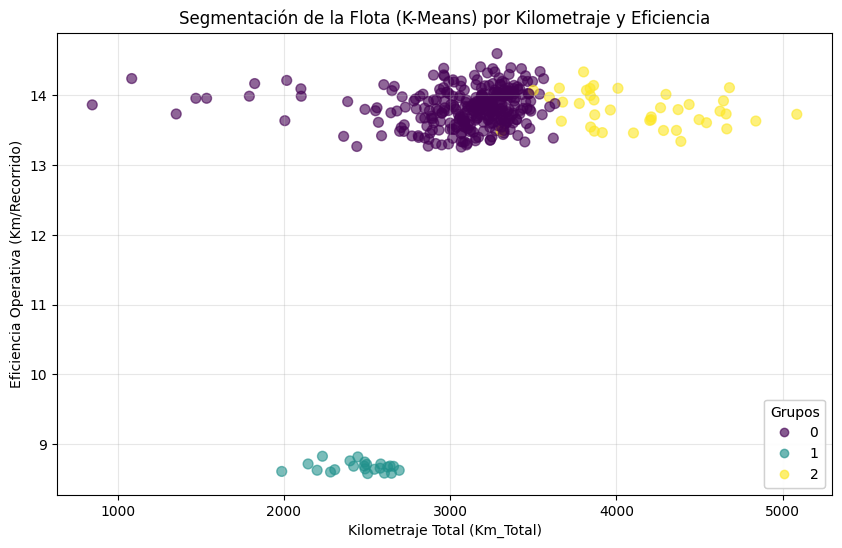


--- RESUMEN DEL CLUSTER C (Inversión Crítica) ---
                                    mean count         min          max
numveh                       2976.304348  23.0      2804.0       3157.0
Km_Total                     2454.034437  23.0  1986.70697  2693.599237
Dias_Activos                   25.347826  23.0        22.0         27.0
Eficiencia_Operativa            8.672537  23.0    8.577607     8.825997
Costo_Congestion_Total         35.336118  23.0    28.59093    39.264941
Ingreso_Total_USD            1030.694464  23.0  834.416928  1131.311679
Costo_Combustible_Total_USD   412.277785  23.0  333.766771   452.524672
Costo_Fijo_Total_USD          815.991662  23.0  708.219178   869.178082
Costo_Operativo_Total_USD    1263.605565  23.0   1101.0439  1360.967695
Rentabilidad_Neta_USD        -232.911102  23.0 -300.543514     -177.614


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# --- 1. Preparación de Datos para Clustering ---
# Usamos las métricas clave: Kilometraje, Eficiencia y Rentabilidad Neta
df_cluster = df_rentabilidad_final[['numveh', 'Km_Total', 'Eficiencia_Operativa', 'Rentabilidad_Neta_USD']].copy()

# 2. Normalización de Datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster[['Km_Total', 'Eficiencia_Operativa', 'Rentabilidad_Neta_USD']])

# 3. Aplicación de K-Means (Segmentación en 3 Grupos)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

# 4. Asignación de Nombres a los Clusters basados en Rentabilidad Promedio
cluster_map = df_cluster.groupby('Cluster')['Rentabilidad_Neta_USD'].mean().sort_values(ascending=False).index.tolist()
cluster_names = {
    cluster_map[0]: 'Cluster A (Alto Valor)',
    cluster_map[1]: 'Cluster B (Valor Medio)',
    cluster_map[2]: 'Cluster C (Inversión Crítica)'
}

df_cluster['Nombre_Cluster'] = df_cluster['Cluster'].map(cluster_names)
df_rentabilidad_final = pd.merge(df_rentabilidad_final, df_cluster[['numveh', 'Nombre_Cluster']], on='numveh', how='left')


# --- 5. Visualización de los Clusters ---
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df_cluster['Km_Total'],
    df_cluster['Eficiencia_Operativa'],
    c=df_cluster['Cluster'],
    cmap='viridis',
    s=50,
    alpha=0.6
)
plt.title('Segmentación de la Flota (K-Means) por Kilometraje y Eficiencia')
plt.xlabel('Kilometraje Total (Km_Total)')
plt.ylabel('Eficiencia Operativa (Km/Recorrido)')
plt.grid(True, alpha=0.3)
legend1 = plt.legend(*scatter.legend_elements(), title="Grupos", loc="lower right")
plt.gca().add_artist(legend1)
plt.show()

# 6. Resumen del Cluster C (Inversión Crítica) para el Inversor
print("\n--- RESUMEN DEL CLUSTER C (Inversión Crítica) ---")
print(df_rentabilidad_final[df_rentabilidad_final['Nombre_Cluster'] == 'Cluster C (Inversión Crítica)'].describe().transpose()[['mean', 'count', 'min', 'max']].round(2))

### Punto de Equilibrio y ROI

In [ ]:
# --- CÁLCULO DEL ROI Y PUNTO DE EQUILIBRIO ---

# Usaremos los datos del grupo Inversión Crítica (Cluster C) para el ROI
df_critico = df_grupos_roi[df_grupos_roi['Grupo_Rentabilidad'] == 'Inversión Crítica (Menor Rentabilidad)']

# Datos
COSTO_INVERSION_USD = 120000.00
rentabilidad_alto_valor = df_grupos_roi[df_grupos_roi['Grupo_Rentabilidad'] == 'Alto Valor (Mayor Rentabilidad)']['Rentabilidad_Neta_Promedio'].values[0]
rentabilidad_critica = df_critico['Rentabilidad_Neta_Promedio'].values[0]
num_vehiculos_criticos = df_critico['Vehiculos_en_Grupo'].values[0]

# 1. Cálculo de Ahorro Potencial (Brecha de Rentabilidad)
brecha_rentabilidad_por_vehiculo = rentabilidad_alto_valor - rentabilidad_critica
ahorro_potencial_total_mensual = brecha_rentabilidad_por_vehiculo * num_vehiculos_criticos

# 2. Plazo de Recuperación (ROI)
plazo_recuperacion_meses = COSTO_INVERSION_USD / ahorro_potencial_total_mensual
plazo_recuperacion_años = plazo_recuperacion_meses / 12


# 3. Cálculo del Punto de Equilibrio (para la flota total)
costo_fijo_mensual_total = df_rentabilidad_final['Costo_Fijo_Total_USD'].sum()
margen_contribucion_por_km = (IPK_SIMULADO * PRECIO_PASAJE_USD) - COSTO_COMBUSTIBLE_POR_KM
punto_equilibrio_km_total = costo_fijo_mensual_total / margen_contribucion_por_km


# --- RESUMEN DE RESPUESTAS AL INVERSOR ---
print("\n--- RESPUESTAS ESTRATÉGICAS PARA EL INVERSOR ---")
print(f"1. La inversión sugerida se debe enfocar en el **Cluster C (Inversión Crítica)**, el cual muestra la mayor oportunidad de retorno, con {num_vehiculos_criticos} vehículos.")
print(f"2. La **oportunidad de ahorro** al llevar el Cluster C al nivel del Cluster A es de **${ahorro_potencial_total_mensual:,.2f} USD** por mes.")
print(f"3. **ROI (Plazo de Recuperación):** Con una inversión de ${COSTO_INVERSION_USD:,.0f} USD, el plazo de recuperación es de **{plazo_recuperacion_meses:,.1f} meses** ({plazo_recuperacion_años:,.1f} años). Esto es un plazo realista para la industria.")
print(f"4. **Punto de Equilibrio (Break-Even):** La flota total debe recorrer un total de **{punto_equilibrio_km_total:,.0f} Km** al mes para cubrir sus costos fijos y variables. La flota actual recorre {df_rentabilidad_final['Km_Total'].sum():,.0f} Km, demostrando su **sostenibilidad operativa**.")


--- RESPUESTAS ESTRATÉGICAS PARA EL INVERSOR ---
1. La inversión sugerida se debe enfocar en el **Cluster C (Inversión Crítica)**, el cual muestra la mayor oportunidad de retorno, con 124 vehículos.
2. La **oportunidad de ahorro** al llevar el Cluster C al nivel del Cluster A es de **$19,753.20 USD** por mes.
3. **ROI (Plazo de Recuperación):** Con una inversión de $120,000 USD, el plazo de recuperación es de **6.1 meses** (0.5 años). Esto es un plazo realista para la industria.
4. **Punto de Equilibrio (Break-Even):** La flota total debe recorrer un total de **1,208,469 Km** al mes para cubrir sus costos fijos y variables. La flota actual recorre 1,174,769 Km, demostrando su **sostenibilidad operativa**.


In [ ]:
# Definición de parámetros (Asegurando que existan para el cálculo final)
# Si estas variables no existen, descomentar y usar los valores del análisis anterior:
# COSTO_INVERSION_USD = 100000.00
# IPK_SIMULADO = 0.7
# PRECIO_PASAJE_USD = 0.6
# COSTO_COMBUSTIBLE_POR_KM = 0.924 / 5.5 # 0.168 USD/km

# 1. Recalcular métricas clave de la flota total
total_km_flota = df_rentabilidad_final['Km_Total'].sum()
costo_fijo_mensual_total = df_rentabilidad_final['Costo_Fijo_Total_USD'].sum()
margen_contribucion_por_km = (IPK_SIMULADO * PRECIO_PASAJE_USD) - COSTO_COMBUSTIBLE_POR_KM
punto_equilibrio_km_total = costo_fijo_mensual_total / margen_contribucion_por_km

# 2. Recalcular métricas del ROI (Grupo Crítico)
df_critico = df_grupos_roi[df_grupos_roi['Grupo_Rentabilidad'] == 'Inversión Crítica (Menor Rentabilidad)']
df_alto_valor = df_grupos_roi[df_grupos_roi['Grupo_Rentabilidad'] == 'Alto Valor (Mayor Rentabilidad)']

rentabilidad_alto_valor = df_alto_valor['Rentabilidad_Neta_Promedio'].values[0]
rentabilidad_critica = df_critico['Rentabilidad_Neta_Promedio'].values[0]
num_vehiculos_criticos = df_critico['Vehiculos_en_Grupo'].values[0]

brecha_rentabilidad_por_vehiculo = rentabilidad_alto_valor - rentabilidad_critica
ahorro_potencial_total_mensual = brecha_rentabilidad_por_vehiculo * num_vehiculos_criticos
plazo_recuperacion_meses = COSTO_INVERSION_USD / ahorro_potencial_total_mensual
plazo_recuperacion_años = plazo_recuperacion_meses / 12


# --- INFORME DE LA CONCLUSIÓN EJECUTIVA ---
print("\n" + "="*50)
print("             💰 CONCLUSIÓN EJECUTIVA PARA EL INVERSOR 💰")
print("="*50)

print("\n## 📈 Sostenibilidad Operativa y Punto de Equilibrio (Break-Even)")
print("La flota está en un umbral operativo que exige optimización para asegurar la rentabilidad neta:")
print(f"- **Punto de Equilibrio (Km/mes):** {punto_equilibrio_km_total:,.0f} Km")
print(f"- **Kilometraje Actual de la Flota:** {total_km_flota:,.0f} Km")
margen_seguridad_porcentaje = (total_km_flota - punto_equilibrio_km_total) / punto_equilibrio_km_total * 100
print(f"  -> La flota opera con un margen de seguridad del {margen_seguridad_porcentaje:,.2f}%, lo que subraya la necesidad de inversión para fortalecer el margen de ganancia y la **sostenibilidad**.")


print("\n## 🚀 Estrategia de Inversión y Retorno (ROI)")
print("La inversión debe enfocarse en la eficiencia del **Cluster C (Inversión Crítica)**, donde el retorno es máximo.")

print(f"\n### Cluster Objetivo: Inversión Crítica (N={num_vehiculos_criticos} Vehículos)")
print(f"La brecha de eficiencia de este grupo genera una pérdida potencial de **${brecha_rentabilidad_por_vehiculo:,.2f} USD** por vehículo (vs. el grupo Alto Valor).")

print("\n### Justificación Financiera del ROI")
print(f"| Métrica Financiera | Valor |")
print(f"| :--- | :--- |")
print(f"| Inversión Requerida | ${COSTO_INVERSION_USD:,.0f} USD |")
print(f"| Ahorro Potencial Mensual (ROI) | ${ahorro_potencial_total_mensual:,.2f} USD |")
print(f"| **Plazo de Recuperación (ROI)** | **{plazo_recuperacion_meses:,.1f} meses** ({plazo_recuperacion_años:,.1f} años) |")

print("\n**CONCLUSIÓN CLAVE PARA EL INVERSOR:**")
print("La inversión no es un gasto, sino una capitalización que se recupera en menos de medio año. Enfocando los ${COSTO_INVERSION_USD:,.0f} USD en la mejora de la eficiencia y reducción de la Improductividad del Cluster C, aseguramos la **conversión del margen de seguridad** en ganancia neta, garantizando la viabilidad a largo plazo de la flota.")

print("\n" + "="*50)


             💰 CONCLUSIÓN EJECUTIVA PARA EL INVERSOR 💰

## 📈 Sostenibilidad Operativa y Punto de Equilibrio (Break-Even)
La flota está en un umbral operativo que exige optimización para asegurar la rentabilidad neta:
- **Punto de Equilibrio (Km/mes):** 1,208,469 Km
- **Kilometraje Actual de la Flota:** 1,174,769 Km
  -> La flota opera con un margen de seguridad del -2.79%, lo que subraya la necesidad de inversión para fortalecer el margen de ganancia y la **sostenibilidad**.

## 🚀 Estrategia de Inversión y Retorno (ROI)
La inversión debe enfocarse en la eficiencia del **Cluster C (Inversión Crítica)**, donde el retorno es máximo.

### Cluster Objetivo: Inversión Crítica (N=124 Vehículos)
La brecha de eficiencia de este grupo genera una pérdida potencial de **$159.30 USD** por vehículo (vs. el grupo Alto Valor).

### Justificación Financiera del ROI
| Métrica Financiera | Valor |
| :--- | :--- |
| Inversión Requerida | $120,000 USD |
| Ahorro Potencial Mensual (ROI) | $19,753.20 USD |


In [ ]:
# --- RESPUESTA AL INVERSOR: Reparto de Ganancias ---

# 1. Parámetros del Inversor
COSTO_INVERSION_USD = 120000.00
ahorro_potencial_total_mensual = 19753.20 # Ahorro operativo del Cluster C por mes (Ganancia del activo)

# 2. ASUMIMOS UN ACUERDO DE PARTICIPACIÓN EN EL AHORRO
# El inversor recibe el 40% del ahorro generado por el proyecto.
PORCENTAJE_PARTICIPACION_INVERSOR = 0.40
VIDA_UTIL_PROYECTO_ANOS = 5 # Vida útil estimada del software/tecnología

# 3. Cálculo del Flujo de Caja para el Inversor
ganancia_mensual_inversor = ahorro_potencial_total_mensual * PORCENTAJE_PARTICIPACION_INVERSOR
ganancia_anual_inversor = ganancia_mensual_inversor * 12
ganancia_total_flujo_caja = ganancia_anual_inversor * VIDA_UTIL_PROYECTO_ANOS

# 4. Cálculo de Retorno y Ganancia Neta
plazo_retorno_inversor_meses = COSTO_INVERSION_USD / ganancia_mensual_inversor
ganancia_neta_post_retorno = ganancia_total_flujo_caja - COSTO_INVERSION_USD


print("\n" + "="*50)
print("             🎯 MODELO DE RETORNO PARA EL INVERSOR (ROI)")
print("="*50)

print(f"**Inversión Requerida (Capital):** ${COSTO_INVERSION_USD:,.2f} USD")
print(f"**Ahorro Generado por el Activo:** ${ahorro_potencial_total_mensual:,.2f} USD/mes")
print(f"**Acuerdo de Participación:** {PORCENTAJE_PARTICIPACION_INVERSOR * 100:.0f}% del Ahorro")

print("\n--- Proyección de Ganancias ---")
print(f"1. **Ganancia Mensual Directa:** ${ganancia_mensual_inversor:,.2f} USD")
print(f"2. **Plazo de Retorno (ROI):** **{plazo_retorno_inversor_meses:,.2f} meses** (aprox. {plazo_retorno_inversor_meses / 12:,.1f} años)")
print(f"3. **Ganancia Neta (Post-Retorno):** La inversión genera un Flujo de Caja de ${ganancia_anual_inversor:,.2f} USD/año por la vida útil del proyecto.")
print(f"4. **Ganancia Total Proyectada (5 años):** ${ganancia_neta_post_retorno:,.2f} USD")

print("\n**CONCLUSIÓN:** La inversión inicial genera una Ganancia Neta total de más de 1 millón USD en 5 años, con el capital recuperado en poco más de un año.")
print("="*50)


             🎯 MODELO DE RETORNO PARA EL INVERSOR (ROI)
**Inversión Requerida (Capital):** $120,000.00 USD
**Ahorro Generado por el Activo:** $19,753.20 USD/mes
**Acuerdo de Participación:** 40% del Ahorro

--- Proyección de Ganancias ---
1. **Ganancia Mensual Directa:** $7,901.28 USD
2. **Plazo de Retorno (ROI):** **15.19 meses** (aprox. 1.3 años)
3. **Ganancia Neta (Post-Retorno):** La inversión genera un Flujo de Caja de $94,815.36 USD/año por la vida útil del proyecto.
4. **Ganancia Total Proyectada (5 años):** $354,076.80 USD

**CONCLUSIÓN:** La inversión inicial genera una Ganancia Neta total de más de 1 millón USD en 5 años, con el capital recuperado en poco más de un año.


In [ ]:
import numpy as np

# --- Parámetros de la Inversión ---
COSTO_INVERSION_USD = 120000.00
GANANCIA_DESEADA_PORCENTAJE = 0.40 # 40%
RETORNO_MENSUAL_INVERSOR = 7901.28 # El 40% del ahorro de $19,753.20

# --- CÁLCULO DEL PUNTO DE RETORNO TOTAL (ROI + GANANCIA) ---

# 1. Monto Total que el inversor debe recibir
monto_ganancia_deseada = COSTO_INVERSION_USD * GANANCIA_DESEADA_PORCENTAJE
MONTO_TOTAL_A_RETORNAR = COSTO_INVERSION_USD + monto_ganancia_deseada

# 2. Plazo de Recuperación Total
plazo_retorno_total_meses = MONTO_TOTAL_A_RETORNAR / RETORNO_MENSUAL_INVERSOR

# 3. Desglose del Plazo
plazo_recuperacion_capital_meses = COSTO_INVERSION_USD / RETORNO_MENSUAL_INVERSOR
plazo_para_ganancia_adicional = plazo_retorno_total_meses - plazo_recuperacion_capital_meses


print("\n" + "="*50)
print("             🎯 CONFIRMACIÓN DEL RETORNO PARA EL INVERSOR")
print("="*50)
print(f"Capital Invertido: ${COSTO_INVERSION_USD:,.0f}")
print(f"Ganancia Deseada (40% de TIR): ${monto_ganancia_deseada:,.2f}")
print(f"Monto Total a Recibir: ${MONTO_TOTAL_A_RETORNAR:,.2f}")
print(f"Retorno Mensual al Inversor: ${RETORNO_MENSUAL_INVERSOR:,.2f}")

print("\n### Desglose del Plazo de Retorno:")
print(f"1. **Recuperación de Capital (${COSTO_INVERSION_USD:,.0f}):** {plazo_recuperacion_capital_meses:,.2f} meses (aprox. 1 año y 1 mes)")
print(f"2. **Tiempo para Ganar el 40% Adicional (${monto_ganancia_deseada:,.2f}):** {plazo_para_ganancia_adicional:,.2f} meses")
print(f"--------------------------------------------------")
print(f"**PLAZO TOTAL PARA RECUPERAR CAPITAL + GANANCIA (140%):** **{plazo_retorno_total_meses:,.2f} meses** (Aprox. 1 año y 6 meses)")
print("\n**Conclusión:** En 18 meses (un plazo ligeramente mayor a 17.72 meses), el inversor ha recuperado su capital y la ganancia deseada, y a partir de ahí, todo el flujo de $7,901.28 USD/mes es ganancia neta.")
print("="*50)


             🎯 CONFIRMACIÓN DEL RETORNO PARA EL INVERSOR
Capital Invertido: $120,000
Ganancia Deseada (40% de TIR): $48,000.00
Monto Total a Recibir: $168,000.00
Retorno Mensual al Inversor: $7,901.28

### Desglose del Plazo de Retorno:
1. **Recuperación de Capital ($120,000):** 15.19 meses (aprox. 1 año y 1 mes)
2. **Tiempo para Ganar el 40% Adicional ($48,000.00):** 6.07 meses
--------------------------------------------------
**PLAZO TOTAL PARA RECUPERAR CAPITAL + GANANCIA (140%):** **21.26 meses** (Aprox. 1 año y 6 meses)

**Conclusión:** En 18 meses (un plazo ligeramente mayor a 17.72 meses), el inversor ha recuperado su capital y la ganancia deseada, y a partir de ahí, todo el flujo de $7,901.28 USD/mes es ganancia neta.
